# Đọc data

In [1031]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from IPython.display import display


In [1032]:
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_colwidth', 200)

In [1033]:
# import data_goc
data_original = pd.read_csv(r'D:\Python_code\DS108_Đồ_án\API_code\4186_records_data_bronze.csv')
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           4186 non-null   int64 
 1   Job_Title            4186 non-null   object
 2   Description          4186 non-null   object
 3   Role                 4186 non-null   object
 4   Time_Range           4186 non-null   object
 5   Skills               4186 non-null   object
 6   Location_Detail      4186 non-null   object
 7   Province             4186 non-null   object
 8   Experience_Years     4186 non-null   object
 9   Salary               4186 non-null   object
 10  Company_Name         4186 non-null   object
 11  Company_URL          4186 non-null   object
 12  Job_Type             4186 non-null   object
 13  Deadline             4186 non-null   object
 14  Academic_Level       4186 non-null   object
 15  Benefits             4186 non-null   object
 16  Level 

In [1034]:
data_original

,Unnamed: 0,Job_Title,Description,Role,Time_Range,Skills,Location_Detail,Province,Experience_Years,Salary,...,Company_URL,Job_Type,Deadline,Academic_Level,Benefits,Level,URL,Recruitment_Count,Date_Crawl_Module_1,Company_Field
0,0,Korean Bridge Software Engineer - Kỹ Sư Cầu Nối Tiếng Hàn,"Bridge in communication with Korean clients on all project-related matters\r\nAnalyze, clarify, and transfer client’s requests and requirements to project team members.\r\nControl all project’s materials.\r\nManage or work closely with Delivery team/ sales team to monitor and control project.\r\nPerform testing if needed\r\n[Required]\r\nBachelor's Degree\r\nFrom 1 year of experience translating/interpreting in the IT field\r\nStrong written and verbal communication skills in Korean\r\nTOPIK 5 or higher\r\nStrong written and reading in English (TOEIC 650)\r\nSelf-motivated and eager to learn (in business domain, software engineering, language).\r\nHigh responsibility and teamwork spirit.\r\n[Nice to have]\r\nProject management/BA/Tester experience",Kỹ sư cầu nối BrSE,Thứ 2 - Thứ 6 (từ 08:00 đến 17:00),Null,"- Hà Nội: Tầng 15, Keangnam Landmark 72, Nam Từ Liêm",Hà Nội,1 năm,Thoả thuận,...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,Toàn thời gian,16/05/2025,Đại Học trở lên,"Attractive salary and bonus will be discussed after going through CV & Interview\r\nReview capacity annually and adjust salary increases according to work performance.\r\nHealth care: Premium health insurance, Annual health check-up\r\nYoung working environment\r\nGood career development opportunities with interesting and challenging projects.\r\nEnglish, Korean, technical, soft skills training courses.\r\nOpportunity to learn special courses from LG CNS, new technology and security.\r\nGifts on holidays (April 30th - May 1st, September 2nd, Tet, etc.)\r\nOutdoor activities with company support: sports clubs, team building, happy hour parties, birthdays, travel, employee and family events, etc.\r\nWorking hours: 8 hours from Monday - Friday (8:00 - 12:00 - 13:00 - 17:00)",Nhân viên,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,1 người,01/05/2025 20:38:51,IT - Phần mềm
1,1,Network Technical Support Specialist,"As a Network Technical Support Specialist, you will provide technical support to customers and partner, focused on pre-sales test support, partner training and project implementation on Ruijie network products or solution, meanwhile you also need to be responsible for service delivery quality in coverage territory.\r\nTo be successful in this role, you must be a motivated self-starter and self-learner, possess strong customer service and technical problem solving skills\r\nMain responsibilities\r\n1. Work with remote TAC and R&D team to conduct pre-sales test, POC and demonstration with the focus on Network and Wireless area;\r\n2. Collaborate with TAC level 2 support team closely to solve the partner and customer’s technical issue and service request quickly;\r\n3. Provide technical support to enterprise industry channel partner with the focus on Campus Network and Wireless area;\r\n4. Empower channel partner’s technical service capability by managing and conducting company service process training, technical certification training, product training and technical workshop regularly;\r\n5. Help to setup services process system (customer technical support, RMA process and project delivery process etc.) and services delivery quality in responsible countries by managing the service delivery of service partners.\r\n1. Bachelor or associate degree in network essentials or related discipline, or equivalent work experience.\r\n2. More than 3 years’ technical support and implementation experience in network related area (Switch, Router, VPN and Wireless etc.) Experience with Cisco, HPE, Aruba, Ruckus, Huawei and Juniper Networks is preferred.\r\n3. Experience on configurat

In [1035]:
# import data đã được xử lí bằng API
data_API = pd.read_parquet('D:\Python_code\DS108_Đồ_án\API_code\standardized_data.parquet')
data_API.head(5)

,Job_Title,Tech_Stack,Programming_Language,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,Province,Salary_Min,...,Academic_Level,Experience_Years,Level,Company_Name,Company_Field,Company_URL,Deadline,URL,Date_Crawl_Module_1,Role
0,Kỹ sư Cầu Nối Brse,None,None,2,6,False,False,40,[Hà Nội],NaN,...,Đại Học trở lên,1 năm,Nhân viên,Công Ty TNHH LG CNS VIỆT NAM,IT - Phần mềm,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,Kỹ sư cầu nối BrSE
1,Network Technical Support Specialist,"[SWITCH, ROUTER, VPN, WIRELESS LAN CONTROLLER, ACCESS POINT, WIRELESS LAN SECURITY, WEP, WPA2, WPA3, LEAP, PEAP, CISCO, HPE, ARUBA, RUCKUS, HUAWEI, JUNIPER NETWORKS]",None,<NA>,<NA>,None,None,NaN,"[Bắc Ninh, Hà Nội, Bắc Giang]",NaN,...,Cao Đẳng trở lên,3 năm,Nhân viên,CÔNG TY TNHH CÔNG NGHỆ ECOLIV,Bán lẻ - Hàng tiêu dùng - FMCG,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,Technical Leader
2,Gaming SOP Designer,[PHOTOSHOP],None,<NA>,<NA>,None,None,NaN,"[Đà Nẵng, Hà Nội]","10,000,000",...,Trung học phổ thông (Cấp 3) trở lên,1 năm,Nhân viên,CÔNG TY TNHH MTV NIA-STUDIO,IT - Phần mềm,https://www.topcv.vn/cong-ty/cong-ty-tnhh-mtv-nia-studio/147591.html,22/05/2025,https://www.topcv.vn/viec-lam/gaming-sop-designer/1704685.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:42:15,Game Developer
3,Lập Trình Viên Backend Java,"[SPRING BOOT, API, RESTFUL APIS, SOAP, GIT, SVN, ECLIPSE, INTELLIJ, NETBEANS, ORACLE, SQL, WEBFORM, MVC, ANGULAR, FINTECH, MICROSERVICE, CONTAINER, MESSAGE QUEUE, REDIS, KAFKA, KIỂM THỬ PHẦN MỀM (UNIT TESTING, INTEGRATION TESTING), DEVOPS CI/CD]","[JAVA, SQL]",2,6,False,False,48,[Hà Nội],"16,000,000",...,Đại Học trở lên,3 năm,Nhân viên,Công ty Cổ phần SIMBATECH,IT - Phần mềm,https://www.topcv.vn/cong-ty/cong-ty-co-phan-simbatech/32829.html,30/06/2025,https://www.topcv.vn/viec-lam/lap-trinh-vien-backend-java-thu-nhap-tu-16-32-trieu-nghi-thu-7-chu-nhat/1713501.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:40:01,Backend Developer
4,Chuyên Viên Kiểm Thử Phần Mềm Tester,"[QTEST, JIRA, CONFLUENCE, ISTQB, API, CORE BANKING, SWIFT, BPM, ECM, EBANKING]",[SQL],2,6,False,False,48,[Hà Nội],"16,000,000",...,Đại Học trở lên,3 năm,Nhân viên,Công ty Cổ phần SIMBATECH,IT - Phần mềm,https://www.topcv.vn/cong-ty/cong-ty-co-phan-simbatech/32829.html,30/06/2025,https://www.topcv.vn/viec-lam/chuyen-vien-kiem-thu-phan-mem-tester-thu-nhap-tu-16-32-trieu-nghi-thu-7-chu-nhat/1713391.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:40:20,Manual Tester


# Xóa khoảng trắng thừa

In [1036]:
cols_convert_to_list = ['Tech_Stack', 'Programming_Language', 'Province', 'Language']
#Chuyển đổi toàn bộ cột có kiểu dữ liệu np.ndarray sang list
for col in cols_convert_to_list:
    data_API[col] = data_API[col].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)


In [1037]:
#Xóa khoảng trắng thừa ở đầu và cuối chuỗi
data_API = data_API.map(lambda x: x.strip() if isinstance(x, str) else x)
#Xóa khoảng trắng thừa ở đầu và cuối cho các cột có kiểu dữ liệu là list
for col in cols_convert_to_list:
    data_API[col] = data_API[col].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)

In [1038]:
data_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job_Title                  4186 non-null   object 
 1   Tech_Stack                 3907 non-null   object 
 2   Programming_Language       2634 non-null   object 
 3   First_Working_Day_Of_Week  3717 non-null   float64
 4   Last_Working_Day_Of_Week   3717 non-null   float64
 5   Work_On_Saturday           3635 non-null   object 
 6   Work_On_Sunday             3609 non-null   object 
 7   Total_Work_Hour            3220 non-null   float64
 8   Province                   4186 non-null   object 
 9   Salary_Min                 1960 non-null   float64
 10  Salary_Max                 2361 non-null   float64
 11  Recruitment_Count          4186 non-null   int64  
 12  Language                   4173 non-null   object 
 13  Job_Type                   4186 non-null   objec

In [1039]:
data_API_before = data_API.copy()

In [1040]:
data_API.isnull().sum()

Job_Title                       0
Tech_Stack                    279
Programming_Language         1552
First_Working_Day_Of_Week     469
Last_Working_Day_Of_Week      469
Work_On_Saturday              551
Work_On_Sunday                577
Total_Work_Hour               966
Province                        0
Salary_Min                   2226
Salary_Max                   1825
Recruitment_Count               0
Language                       13
Job_Type                        0
Academic_Level                  0
Experience_Years                0
Level                           0
Company_Name                    0
Company_Field                   0
Company_URL                     0
Deadline                        0
URL                             0
Date_Crawl_Module_1             0
Role                            0
dtype: int64

In [1041]:
#Kiểm tra kiểu dữ liệu và đếm số lượng kiểu dữ liệu trong 1 cột
for col in data_API.columns:
    print(data_API[col].apply(type).value_counts())

Job_Title
<class 'str'>    4186
Name: count, dtype: int64
Tech_Stack
<class 'list'>        3907
<class 'NoneType'>     279
Name: count, dtype: int64
Programming_Language
<class 'list'>        2634
<class 'NoneType'>    1552
Name: count, dtype: int64
First_Working_Day_Of_Week
<class 'float'>    4186
Name: count, dtype: int64
Last_Working_Day_Of_Week
<class 'float'>    4186
Name: count, dtype: int64
Work_On_Saturday
<class 'bool'>        3635
<class 'NoneType'>     551
Name: count, dtype: int64
Work_On_Sunday
<class 'bool'>        3609
<class 'NoneType'>     577
Name: count, dtype: int64
Total_Work_Hour
<class 'float'>    4186
Name: count, dtype: int64
Province
<class 'list'>    4186
Name: count, dtype: int64
Salary_Min
<class 'float'>    4186
Name: count, dtype: int64
Salary_Max
<class 'float'>    4186
Name: count, dtype: int64
Recruitment_Count
<class 'int'>    4186
Name: count, dtype: int64
Language
<class 'list'>        4173
<class 'NoneType'>      13
Name: count, dtype: int64
Job_Ty

# Xem giá trị unique của các thuộc tính

In [1042]:
#Xem giá trị unique của các cột không phải là list
list_cols = ['Tech_Stack', 'Programming_Language', 'Province', 'Language']
for col in data_API.columns:
    if col not in list_cols:
        print(f"Unique values in {col}:")
        print(data_API[col].unique())
        print("\n")
    

Unique values in Job_Title:
['Kỹ sư Cầu Nối Brse' 'Network Technical Support Specialist'
 'Gaming SOP Designer' ...
 'Cộng Tác Viên Tester - Trải Nghiệm Học Sinh Teky'
 'Chuyên Viên Phân Tích Dữ Liệu Bất Động Sản Úc'
 'Nhân Viên IT (It Support / It Helpdesk)']


Unique values in First_Working_Day_Of_Week:
[ 2. nan  3.  1.  7.]


Unique values in Last_Working_Day_Of_Week:
[ 6. nan  1.  5.  7.]


Unique values in Work_On_Saturday:
[False None True]


Unique values in Work_On_Sunday:
[False None True]


Unique values in Total_Work_Hour:
[40.                 nan 47.5        45.         49.         54.
 44.5        47.25       47.75       44.         46.25       42.
 45.25       48.5        37.5        51.         51.5        54.5
 49.5        46.5        51.25       49.16666667 42.5        48.
 42.75       53.         49.25       50.         41.25       43.5
 48.25       44.25       52.5        42.25       47.8        47.83
 46.         39.         43.75       44.83       42.08333333 50.25

# Chuẩn hóa giá trị None (missing values)

In [1043]:
list_cols = ['Tech_Stack', 'Programming_Language', 'Province', 'Language']

# Chuyển np.ndarray về list trước
for col in list_cols:
    data_API[col] = data_API[col].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

# Thay thế các phần tử có danh sách rỗng bằng None
for col in list_cols:
    data_API[col] = data_API[col].apply(lambda x: None if isinstance(x, list) and len(x) == 0 else x)

# Thay thế các khoảng trắng trong các cột có kiểu dữ liệu list là None
for col in list_cols:
    data_API[col] = data_API[col].apply(lambda x: None if isinstance(x, list) and all(item == '' for item in x) else x)
# Thay thế khoảng trắng bằng None
data_API = data_API.replace(['', 'NULL', 'Null', 'Hết hạn nộp đơn'], None)
data_API = data_API.replace('Khác', 'UNKNOWN')

In [1044]:
#Kiểm tra kiểu dữ liệu và đếm số lượng kiểu dữ liệu trong 1 cột
for col in data_API.columns:
    print(data_API[col].apply(type).value_counts())

Job_Title
<class 'str'>    4186
Name: count, dtype: int64
Tech_Stack
<class 'list'>        3900
<class 'NoneType'>     286
Name: count, dtype: int64
Programming_Language
<class 'list'>        2633
<class 'NoneType'>    1553
Name: count, dtype: int64
First_Working_Day_Of_Week
<class 'float'>    4186
Name: count, dtype: int64
Last_Working_Day_Of_Week
<class 'float'>    4186
Name: count, dtype: int64
Work_On_Saturday
<class 'bool'>        3635
<class 'NoneType'>     551
Name: count, dtype: int64
Work_On_Sunday
<class 'bool'>        3609
<class 'NoneType'>     577
Name: count, dtype: int64
Total_Work_Hour
<class 'float'>    4186
Name: count, dtype: int64
Province
<class 'list'>        4182
<class 'NoneType'>       4
Name: count, dtype: int64
Salary_Min
<class 'float'>    4186
Name: count, dtype: int64
Salary_Max
<class 'float'>    4186
Name: count, dtype: int64
Recruitment_Count
<class 'int'>    4186
Name: count, dtype: int64
Language
<class 'list'>        4173
<class 'NoneType'>      13
N

In [1045]:
# Kiểm tra missing values
data_API.isnull().sum().sort_values(ascending=False)

Salary_Min                   2226
Salary_Max                   1825
Programming_Language         1553
Date_Crawl_Module_1          1204
Total_Work_Hour               966
Work_On_Sunday                577
Work_On_Saturday              551
First_Working_Day_Of_Week     469
Last_Working_Day_Of_Week      469
Deadline                      439
Tech_Stack                    286
Company_Field                 167
Language                       13
Province                        4
Job_Type                        1
Academic_Level                  1
Level                           1
Company_Name                    1
Company_URL                     1
URL                             0
Job_Title                       0
Experience_Years                0
Recruitment_Count               0
Role                            0
dtype: int64

# Thống kê dữ liệu số


In [1046]:
# Basic numeric statistics
data_API.describe().T

,count,mean,std,min,25%,50%,75%,max
First_Working_Day_Of_Week,"3,717",2,0,1,2,2,2,7
Last_Working_Day_Of_Week,"3,717",6,0,1,6,6,6,7
Total_Work_Hour,"3,220",46,2,16,45,45,48,56
Salary_Min,"1,960","17,238,561","14,659,416",0,"10,000,000","15,000,000","20,000,000","480,000,000"
Salary_Max,"2,361","29,321,893","40,574,027",0,"18,000,000","25,000,000","35,000,000","1,303,500,000"
Recruitment_Count,"4,186",2,4,1,1,1,2,100


# Thống kê dữ liệu chuỗi

## Chuẩn hóa in hoa các dữ liệu dạng VĂN BẢN

In [1047]:
cols = data_API.columns.difference(['URL', 'Company_URL'])
for col in cols:
    if data_API[col].apply(lambda x: isinstance(x, list)).any():
        # Áp dụng cho từng phần tử trong mảng
        data_API[col] = data_API[col].apply(
            lambda arr: [str(i).strip().upper() for i in arr] if isinstance(arr, list) else arr
        )
    else:
        # Áp dụng cho chuỗi thông thường
        data_API[col] = data_API[col].apply(
            lambda x: x.strip().upper() if isinstance(x, str) else x
        )
data_API.head()

,Job_Title,Tech_Stack,Programming_Language,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,Province,Salary_Min,...,Academic_Level,Experience_Years,Level,Company_Name,Company_Field,Company_URL,Deadline,URL,Date_Crawl_Module_1,Role
0,KỸ SƯ CẦU NỐI BRSE,None,None,2,6,False,False,40,[HÀ NỘI],NaN,...,ĐẠI HỌC TRỞ LÊN,1 NĂM,NHÂN VIÊN,CÔNG TY TNHH LG CNS VIỆT NAM,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE
1,NETWORK TECHNICAL SUPPORT SPECIALIST,"[SWITCH, ROUTER, VPN, WIRELESS LAN CONTROLLER, ACCESS POINT, WIRELESS LAN SECURITY, WEP, WPA2, WPA3, LEAP, PEAP, CISCO, HPE, ARUBA, RUCKUS, HUAWEI, JUNIPER NETWORKS]",None,NaN,NaN,None,None,NaN,"[BẮC NINH, HÀ NỘI, BẮC GIANG]",NaN,...,CAO ĐẲNG TRỞ LÊN,3 NĂM,NHÂN VIÊN,CÔNG TY TNHH CÔNG NGHỆ ECOLIV,BÁN LẺ - HÀNG TIÊU DÙNG - FMCG,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER
2,GAMING SOP DESIGNER,[PHOTOSHOP],None,NaN,NaN,None,None,NaN,"[ĐÀ NẴNG, HÀ NỘI]","10,000,000",...,TRUNG HỌC PHỔ THÔNG (CẤP 3) TRỞ LÊN,1 NĂM,NHÂN VIÊN,CÔNG TY TNHH MTV NIA-STUDIO,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-mtv-nia-studio/147591.html,22/05/2025,https://www.topcv.vn/viec-lam/gaming-sop-designer/1704685.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:42:15,GAME DEVELOPER
3,LẬP TRÌNH VIÊN BACKEND JAVA,"[SPRING BOOT, API, RESTFUL APIS, SOAP, GIT, SVN, ECLIPSE, INTELLIJ, NETBEANS, ORACLE, SQL, WEBFORM, MVC, ANGULAR, FINTECH, MICROSERVICE, CONTAINER, MESSAGE QUEUE, REDIS, KAFKA, KIỂM THỬ PHẦN MỀM (UNIT TESTING, INTEGRATION TESTING), DEVOPS CI/CD]","[JAVA, SQL]",2,6,False,False,48,[HÀ NỘI],"16,000,000",...,ĐẠI HỌC TRỞ LÊN,3 NĂM,NHÂN VIÊN,CÔNG TY CỔ PHẦN SIMBATECH,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-co-phan-simbatech/32829.html,30/06/2025,https://www.topcv.vn/viec-lam/lap-trinh-vien-backend-java-thu-nhap-tu-16-32-trieu-nghi-thu-7-chu-nhat/1713501.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:40:01,BACKEND DEVELOPER
4,CHUYÊN VIÊN KIỂM THỬ PHẦN MỀM TESTER,"[QTEST, JIRA, CONFLUENCE, ISTQB, API, CORE BANKING, SWIFT, BPM, ECM, EBANKING]",[SQL],2,6,False,False,48,[HÀ NỘI],"16,000,000",...,ĐẠI HỌC TRỞ LÊN,3 NĂM,NHÂN VIÊN,CÔNG TY CỔ PHẦN SIMBATECH,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-co-phan-simbatech/32829.html,30/06/2025,https://www.topcv.vn/viec-lam/chuyen-vien-kiem-thu-phan-mem-tester-thu-nhap-tu-16-32-trieu-nghi-thu-7-chu-nhat/1713391.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:40:20,MANUAL TESTER


### Thống kê dữ liệu string

In [1048]:
# Basic categorical statistics
type_list_cols = ['Tech_Stack', 'Programming_Language', 'Province', 'Language']
# Không thống kê số lượng các cột dạng list
data_API.drop(columns=type_list_cols).describe(include='object').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
URL,4186,4186,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,1
Date_Crawl_Module_1,2982,2982,01/05/2025 20:38:51,1
Job_Title,4186,2614,BUSINESS ANALYST,75
Company_URL,4185,1620,https://www.topcv.vn/cong-ty/fpt-software/3.html,74
Company_Name,4185,1563,FPT SOFTWARE,82
Deadline,3747,76,31/05/2025,542
Role,4186,59,SOFTWARE ENGINEER,467
Company_Field,4019,38,IT - PHẦN MỀM,2615
Experience_Years,4186,8,2 NĂM,1153
Level,4185,7,NHÂN VIÊN,3543


### Thống kê dữ liệu list 'Tech_Stack', 'Programming_Language', 'Province', 'Language'

In [1049]:
# Giả sử cột Tech_Stack, Programming_Language, Province, Language chứa các list
flattened_Tech = list(itertools.chain.from_iterable(data_API['Tech_Stack'].dropna()))
flattened_Programming = list(itertools.chain.from_iterable(data_API['Programming_Language'].dropna()))
flattened_Province = list(itertools.chain.from_iterable(data_API['Province'].dropna()))
flattened_Language = list(itertools.chain.from_iterable(data_API['Language'].dropna()))

# Đếm số lượng unique cho từng giá trị
tech_counts = pd.Series(flattened_Tech).value_counts().reset_index()
tech_counts.columns = ['Tech_Stack', 'Count']

programming_counts = pd.Series(flattened_Programming).value_counts().reset_index()
programming_counts.columns = ['Programming_Language', 'Count']

province_counts = pd.Series(flattened_Province).value_counts().reset_index()
province_counts.columns = ['Province', 'Count']

language_counts = pd.Series(flattened_Language).value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Hiển thị từng DataFrame với tiêu đề rõ ràng
print("\nUnique Programming Languages và số lượng:")
display(programming_counts)
print("Unique Tech Stack và số lượng:")
display(tech_counts)
print("\nUnique Provinces và số lượng:")
display(province_counts)
print("\nUnique Languages và số lượng:")
display(language_counts)


Unique Programming Languages và số lượng:


,Programming_Language,Count
0,SQL,1690
1,JAVA,815
2,PYTHON,774
3,JAVASCRIPT,690
4,NOSQL,546
...,...,...
157,POSTGRES,1
158,EXPRESSJS,1
159,NUXTJS,1
160,BASIC,1


Unique Tech Stack và số lượng:


,Tech_Stack,Count
0,GIT,866
1,DOCKER,576
2,AGILE,446
3,AWS,431
4,MYSQL,390
...,...,...
4990,HIGHCHARTS,1
4991,OBJECT ORIENTED,1
4992,ANDROID AOSP,1
4993,AVAYA UNIFIED COMMUNICATION,1



Unique Provinces và số lượng:


,Province,Count
0,HÀ NỘI,2964
1,HỒ CHÍ MINH,1198
2,ĐÀ NẴNG,118
3,ĐỒNG NAI,24
4,BÌNH DƯƠNG,22
5,NHẬT BẢN,16
6,HƯNG YÊN,16
7,NGHỆ AN,16
8,HẢI PHÒNG,15
9,BÀ RỊA-VŨNG TÀU,12



Unique Languages và số lượng:


,Language,Count
0,TIẾNG VIỆT,3825
1,TIẾNG ANH,1631
2,TIẾNG NHẬT,272
3,TIẾNG TRUNG,52
4,TIẾNG HÀN,25
5,TIẾNG PHÁP,10
6,TIẾNG ĐỨC,6
7,TIẾNG HOA,1
8,TIẾNG THÁI,1


## Chuẩn hóa lại một số kết quả ở các thuộc tính dạng danh sách (list) mà API trả về chưa được nhất quán (Language và Province)

### Language

In [1050]:
# Thống nhất giá trị trong biến Language, thay 'TIẾNG HOA' thành 'TIẾNG TRUNG' 
data_API['Language'] = data_API['Language'].apply(
    lambda x: [lang if lang != 'TIẾNG HOA' else 'TIẾNG TRUNG' for lang in x] if isinstance(x, list) else x
)


### Province

In [1051]:
# Thống nhất giá trị trong biến Province, thống nhất 'BÀ RỊA-VŨNG TÀU' thành 'BÀ RỊA - VŨNG TÀU', 'HUẾ' thành 'THỪA THIÊN HUẾ'
province_standardization = {
    'BÀ RỊA-VŨNG TÀU': 'BÀ RỊA - VŨNG TÀU',
    'HUẾ': 'THỪA THIÊN HUẾ'
}

def standardize_province(province_list):
    if isinstance(province_list, list):
        return [province_standardization.get(prov, prov) for prov in province_list]
    return province_list

data_API['Province'] = data_API['Province'].apply(standardize_province)

### Programming_Language

In [1052]:
# Ciá trị giống nhau nhưng khác format trong Programming_Language
programming_language_alias_mapping = {
    # Ngôn ngữ lập trình chính thức
    "PYTHON": ["PYTHON"],
    "PHP": ["PHP"],
    "RUST": ["RUST"],
    "COBOL": ["COBOL"],
    "PERL": ["PERL"],
    "SCALA": ["SCALA"],
    "ABAP": ["ABAP"],
    "R": ["R"],
    "LUA": ["LUA"],
    "GROOVY": ["GROOVY"],
    "HASKELL": ["HASKELL"],
    "D": ["D"],
    "F#": ["F#"],
    "TCL": ["TCL"],
    "JULIA": ["JULIA"],
    "AWK": ["AWK"],
    "QML": ["QML"],
    "APEX": ["APEX"],
    "SOQL": ["SOQL"],
    "MAXSCRIPT": ["MAXSCRIPT"],
    "X++": ["X++"],
    "VB.NET": ["VB.NET", "VB6", "VB", "VBA", "VISUAL BASIC"],
    "GO": ["GO", "GOLANG"],
    "DART": ["DART"],
    "KOTLIN": ["KOTLIN", "KOLINT"],
    "JAVA": ["JAVA", "JAVA EE"],
    "SWIFT": ["SWIFT", "RXSWIFT"],
    "OBJECTIVE-C": ["OBJECTIVE-C", "OBJECTIVE C"],
    "C": ["C", "C/C++"],
    "C++": ["C++", "VC++"],
    "C#": ["C#", "CSHARP"],
    "MATLAB": ["MATLAB"],
    "ASSEMBLY": ["ASSEMBLY", "ASM"],
    "VERILOG": ["VERILOG", "SYSTEM VERILOG"],
    "ERLANG": ["ERLANG"],
    "JAVASCRIPT": ["JAVASCRIPT", "JS", "ES5", "ES6", "ES6+"],
    "TYPESCRIPT": ["TYPESCRIPT", "TS"],
    "SQL": ["SQL", "PL/SQL", "PLSQL", "T-SQL", "MS SQL", "MSSQL", "MICROSOFT SQL SERVER", "POSTGRES", "POSTGRESQL", "ORACLE", "MYSQL", "MARIADB"],
    "POWERSHELL": ["POWERSHELL"],
    "BASH": ["BASH", "BASH SCRIPT", "BASH SHELL", "BASH SHELL SCRIPT"],
    "SHELL": ["SHELL SCRIPT", "SHELL SCRIPTING", "SHELL-SCRIPT", "SHELL"],

    # Không phải ngôn ngữ lập trình chính thức
    "HTML": ["HTML", "HTML5"],
    "CSS": ["CSS", "CSS3", "SCSS", "SASS/SCSS"],
    "JSON": ["JSON"],
    "XML": ["XML"],
    "YAML": ["YAML"],
    "IOS": ["IOS"],
    "ANDROID": ["ANDROID"],
    "SAS": ["SAS"],
    "JQUERY": ["JQUERY"],
    "JSP": ["JSP"],
    "DJANGO": ["DJANGO"],
    "FLASK": ["FLASK"],
    "LESS": ["LESS"],
    "LIQUID": ["LIQUID"],
    "WINDOWS": ["WINDOWS"],
    "GIT": ["GIT"],
    "MONGODB": ["MONGODB"],
    "CASSANDRA": ["CASSANDRA"],
    "DAX": ["DAX"],
    "POWER QUERY": ["POWER QUERY"],
    "REALM": ["REALM"],
    "UNREAL": ["UNREAL"],
    "UNITY": ["UNITY"],
    "RPA": ["RPA"],
    "DBT": ["DBT"],
    "SPRING BOOT": ["SPRING BOOT"],
    "LINUX": ["LINUX", "UBUNTU", "UNIX"],
    "JSX/TSX": ["JSX", "TSX"],
    "ANGULAR": ["ANGULAR", "ANGULARJS"],
    "NEXT.JS": ["NEXTJS"],
    "NUXT.JS": ["NUXTJS"],
    "NODE.JS": ["NODEJS", "NODE.JS", "NODE"],
    "EXPRESS.JS": ["EXPRESSJS"],
    "GRAPHQL": ["GRAPHQL"],
    "HTTP": ["HTTP"],
    "TCP, IP": ["TCP/IP"],
    "IPV4": ["IPV4"],
    "IPV6": ["IPV6"],
    "APP SCRIPT": ["APP SCRIPT", "APPSCRIPT", "GOOGLE APPS SCRIPT"],
    "ROBOT FRAMEWORK": ["ROBOT FRAMEWORK"],
    "REACT": ["REACT", "REACTJS", "REACT.JS", "REACTNATIVE", "REACT NATIVE", "REACT-NATIVE"],
    "VUE.JS": ["VUE", "VUEJS", "VUE.JS"],
    "REST API": ["REST API", "RESTFUL API", "REST APIS"],
    ".NET": [".NET", "NET", ".NETCORE", "NETCORE", ".NET CORE", "ASP.NET", "ASP.NET CORE", "ASP .NET"],
    "SPARK": ["SPARK", "PYSPARK"],
    "LINQ": ["LINQ"]
}

# Danh sách các ngôn ngữ lập trình chính thức official programming languages
OffProLang = ['PYTHON', 'PHP', 'RUST', 'COBOL', 'PERL', 'SCALA', 'ABAP', 'R', 'LUA', 'GROOVY', 'HASKELL', 'D', 'F#', 'TCL', 'JULIA', 'AWK', 'QML', 'APEX', 'SOQL', 'MAXSCRIPT', 'X++', 'VB.NET', 'GO', 'DART', 'KOTLIN', 'JAVA', 'SWIFT', 'OBJECTIVE-C', 'C', 'C++', 'C#', 'MATLAB', 'ASSEMBLY', 'VERILOG', 'ERLANG', 'JAVASCRIPT', 'TYPESCRIPT', 'SQL', 'POWERSHELL', 'BASH', 'SHELL', 'NOSQL']

# Chuẩn hóa giá trị trong Programming_Language
def normalize_programming_language(lang):
    for key, aliases in programming_language_alias_mapping.items():
        if lang in aliases:
            return key
    return lang
data_API['Programming_Language'] = data_API['Programming_Language'].apply(
    lambda x: [normalize_programming_language(lang) for lang in x] if isinstance(x, list) else x
)


### Tech_Stack


In [1053]:
tech_alias_mapping = {
    # Cloud Providers & Services
    "AWS": ["AWS", "AMAZON WEB SERVICES", "AWS CLOUD", "AMAZON CLOUD"],
    "AZURE": ["AZURE", "MICROSOFT AZURE", "MS AZURE", "AZURE CLOUD"],
    "GCP": ["GCP", "GOOGLE CLOUD", "GOOGLE CLOUD PLATFORM", "GOOGLE CLOUD SERVICES", "GOOGLE CLOUD SERVICE"],
    "AWS S3": ["S3", "AWS S3"],
    "AWS EC2": ["EC2", "AWS EC2"],
    "AWS RDS": ["RDS", "AWS RDS"],
    "AWS LAMBDA": ["LAMBDA", "AWS LAMBDA"],
    "AWS EKS": ["EKS", "AWS EKS"],
    "AWS ELASTICACHE": ["ELASTICACHE", "AWS REDIS"],
    "AWS CLOUDFORMATION": ["CLOUDFORMATION", "AWS CLOUDFORMATION"],
    "AWS CLOUDWATCH": ["CLOUDWATCH", "AWS CLOUDWATCH"],
    "AWS CODEPIPELINE": ["AWS CODEPIPELINE", "AWSCODEPIPELINE"],
    "AWS SNS/SQS": ["SQS", "AWS SNS/SQS", "SNS"],
    "AZURE DEVOPS": ["AZURE DEVOPS", "AZURE DEVOPS CI/CD", "AZURE DEVOPS SERVICES"],
    "AZURE FUNCTIONS": ["AZURE FUNCTIONS", "CLOUD FUNCTIONS"],
    "AZURE ACTIVE DIRECTORY": ["AZURE AD", "AZURE ACTIVE DIRECTORY", "AZUREAD", "MS ENTRA ID"],
    "AZURE SQL DATABASE": ["AZURE SQL", "AZURE SQL DATABASE"],
    "GOOGLE BIGQUERY": ["BIGQUERY", "GOOGLE BIGQUERY"],
    "GOOGLE KUBERNETES ENGINE": ["GKE", "GOOGLE KUBERNETES ENGINE"],
    "DIGITALOCEAN": ["DIGITALOCEAN", "DIGITAL OCEAN"],

    # Databases
    "SQL SERVER": ["SQL SERVER", "MSSQL", "MS SQL", "MICROSOFT SQL SERVER", "SQLSERVER", "SQL SEVER", "MS SQL SERVER", "MSSQLSERVER", "MS-SQL SERVER", "MS SQL DATABASE"],
    "POSTGRESQL": ["POSTGRESQL", "POSTGRES", "POSTGRE", "POSTGRESDB"],
    "MONGODB": ["MONGODB", "MONGO DB", "MONGO"],
    "ORACLE DATABASE": ["ORACLE", "ORACLEDB", "ORACLE DB", "ORACLE DATABASE", "ORALCE"],
    "SQLITE": ["SQLITE", "SQLITE3"],
    "REDIS": ["REDIS", "REDIS CACHE", "REDIS CLUSTER", "REDISMQ", "REDIT"],
    "ELASTICSEARCH": ["ELASTICSEARCH", "ELASTIC SEARCH", "ELASTIC STACK", "ELK", "ELK STACK", "ELATICSEARCH", "ELASTIC"],
    "DYNAMODB": ["DYNAMODB", "AMAZON DYNAMODB"],
    "NOSQL DATABASES": ["NOSQL", "NOSQL DBMS", "NO-SQL DATABASES", "NO-SQL", "NON SQL DATABASE", "NON-SQL"],
    "RDBMS": ["RDBMS", "RELATIONAL DATABASES", "SQL DATABASES", "SQL VÀ CƠ SỞ DỮ LIỆU QUAN HỆ", "SQL VÀ CƠ SỞ DỮ LIỆU QUAN HỆ (MYSQL, POSTGRESQL, ORACLE)"],
    "DATABASE CONCEPTS": ["DATABASE", "DATABASES", "DATABASE DESIGN", "DATABASE MANAGEMENT SYSTEM", "DBMS", "CSDL", "CƠ SỞ DỮ LIỆU", "DATABASES (SQL, NOSQL)", "DB", "DATABASE ADMINISTRATION", "THIẾT KẾ CƠ SỞ DỮ LIỆU", "QUẢN LÝ CƠ SỞ DỮ LIỆU", "DATABASE SYSTEM", "DATABASE SYSTEMS", "HỆ QTCSDL", "SQL/NOSQL"],
    # CI/CD & DevOps
    "CI/CD": ["CI/CD", "CICD", "CI CD", "CONTINUOUS INTEGRATION", "CONTINUOUS DELIVERY", "CONTINUOUS DEPLOYMENT", "CI", "CI-CD", "CI CD PIPELINES", "CI CD PIPELINE", "CI/CT", "DEVOPS CI/CD"],
    "JENKINS": ["JENKINS", "JENKIN"],
    "GITLAB CI/CD": ["GITLAB CI", "GITLAB CI/CD", "GITLABCI", "GITLAB-CI", "GITLAB CI RUNNER"],
    "GITHUB ACTIONS": ["GITHUB ACTIONS", "GITHUB ACTION", "GITHUB ACTIONS CI/CD"],
    "TERRAFORM": ["TERRAFORM", "TERAFORM"],
    "DEVOPS": ["DEVOPS", "AZURE DEVOPS", "AWS DEVOPS", "DEVSECOPS", "DEV OPS", "DEPOPS"],

    # Version Control
    "GIT": ["GIT", "VERSION CONTROL (GIT)", "GIT FLOW", "GIT-FLOW", "GITFLOW", "VERSION CONTROL GIT", "KIỂM SOÁT PHIÊN BẢN (GIT)", "KIỂM SOÁT PHIÊN BẢN (VERSION CONTROL GIT)", "QUẢN LÝ PHIÊN BẢN (VERSION CONTROL GIT)"],
    "GITHUB": ["GITHUB", "GIT HUB"],
    "GITLAB": ["GITLAB", "GIT LAB"],
    "BITBUCKET": ["BITBUCKET", "BITBUCKET PIPELINES"],
    "SVN": ["SVN", "SUBVERSION"],
    "VERSION CONTROL": ["VERSION CONTROL", "VCS", "SCM", "SCM TOOLS", "QUẢN LÝ PHIÊN BẢN"],

    # Frameworks & Libraries
    ".NET CORE": [".NET CORE", ".NETCORE"],
    "ASP.NET": ["ASP.NET", "ASPNET"],
    "ASP.NET MVC": ["ASP.NET MVC", "ASPNET MVC", "MVC4", "MVC5"],
    "ASP.NET CORE": ["ASP.NET CORE", "ASP.NET CORE MVC"],
    "ENTITY FRAMEWORK": ["ENTITY FRAMEWORK", "EF CORE", "ENTITY FRAMEWORK CORE"],
    "SPRING FRAMEWORK": ["SPRING", "SPRING FRAMEWORK", "SPRING CORE", "SPRING JDBC", "SPRING JDBC/ DATA", "SPRING DATA", "SPRING DATA JPA", "SPRING CLOUD", "SPRING CLOUD FRAMEWORK", "SPRING TEST", "SPRINGFRAMEWORK", "SPRING-CORE", "SPRINGMVC", "SPRINGMVC", "SPRING JPA", "SPRING FRAMEWORK (SPRING BOOT, SPRING MVC, SPRING DATA)"],
    "SPRING BOOT": ["SPRING BOOT", "SPRINGBOOT", "JAVA SPRING BOOT", "SPRING-BOOT"],
    "HIBERNATE": ["HIBERNATE", "JPA", "JPA2", "JAVA PERSISTENCE API (JPA)"],
    "REACT": ["REACTJS", "REACT JS", "REACT.JS", "REACT", "REACT COMPONENT"],
    "REACT HOOK": ["REACT HOOK", "REACT HOOKS", "REACT HOOK FORM","HOOKS"],
    "REACT CONTEXT": ["REACT CONTEXT", "REACT CONTEXT API"],

    "REACT NATIVE": ["REACT NATIVE", "REACTNATIVE"],
    "ANGULAR": ["ANGULAR", "ANGULARJS", "ANGULAR JS", "ANGULAR FRAMEWORK", "ANGULAR CLI", "ANGULAR MATERIAL"],
    "VUEJS": ["VUEJS", "VUE.JS", "VUE JS", "VUE", "VUEX", "VUEX/PINIA", "VUE3"],
    "NUXT.JS": ["NUXTJS", "NUXT.JS", "NUXT JS", "NUXT"],
    "VITE.JS": ["VITEJS", "VITE.JS", "VITE JS", "VITE"],

    "NEXT.JS": ["NEXTJS", "NEXT.JS", "NEXT JS", "NEXT"],
    "NODE.JS": ["NODE.JS", "NODEJS", "NODE JS", "NODESJS"],
    "EXPRESS.JS": ["EXPRESSJS", "EXPRESS.JS", "EXPRESS"],
    "DJANGO": ["DJANGO", "DJANGO FRAMEWORK", "DJANGO REST FRAMEWORK"],
    "FLASK": ["FLASK", "FLASK API"],
    "LARAVEL": ["LARAVEL", "LARAVEL FRAMEWORK"],
    "RUBY ON RAILS": ["RUBY ON RAILS", "RAILS"],
    "BOOTSTRAP": ["BOOTSTRAP", "BOOTSTRAP CSS", "BOOTSTRAP 5"],
    "TAILWIND CSS": ["TAILWIND CSS", "TAILWINDCSS", "TAILWIND"],
    "MATERIAL UI": ["MATERIAL UI", "MATERIALUI", "MUI", "MATERIAL DESIGN", "MATERIAL"],
    "ANT DESIGN": ["ANT DESIGN", "ANTD", "ANT-DESIGN", "ANT-DESINE", "ANTD DESIGN"],
    "SASS/SCSS": ["SASS", "SCSS", "SASS/SCSS"],

    # Operating Systems
    "LINUX": ["LINUX", "LINUX SERVER", "LINUX KERNEL", "EMBEDDED LINUX", "LINUX/UNIX", "HỆ ĐIỀU HÀNH LINUX", "LINUX SYSTEM ADMINISTRATION", "ENTERPRISE LINUX", "KALI LINUX", "ALMALINUX", "LINUX OS"],
    "REDHAT": ["REDHAT", "REDHAT/CENTOS", "RED HAT"],
    "WINDOWS": ["WINDOWS", "WINDOWS SERVER", "HỆ ĐIỀU HÀNH WINDOWS", "WIN SERVER", "MS WINDOWS", "WINDOWS FORMS", "WINFORM", "WINFORMS", "WINDOWS 10", "WINDOWS 7", "WINDOWS 8", "WINDOWS XP", "WINDOW"],
    "MACOS": ["MACOS", "MAC OS", "HỆ ĐIỀU HÀNH MACOS"],
    "UNIX": ["UNIX", "UNIX/LINUX", "HỆ ĐIỀU HÀNH UNIX"],
    "ANDROID": ["ANDROID", "ANDROID SDK", "ANDROID STUDIO", "ANDROID JETPACK", "ANDROID ARCHITECTURE COMPONENTS", "ANDROIDX"],
    "IOS": ["IOS", "IOS SDK"],
    "OPERATING SYSTEM": ["OS", "HỆ ĐIỀU HÀNH", "OPERATING SYSTEMS", "SYSTEM OS"],

    # Virtualization & Containerization
    "DOCKER": ["DOCKER", "DOCKER HUB"],
    "DOCKER COMPOSE": ["DOCKER COMPOSE", "DOCKER-COMPOSE"],
    "KUBERNETES": ["KUBERNETES", "K8S", "KUBEADM", "KUBENATES", "KUBERNETE"],
    "HELM": ["HELM", "HELM CHART"],
    "CONTAINERIZATION": ["CONTAINERIZATION", "CONTAINER", "CONTAINERS", "CONTAINER ORCHESTRATION", "CONTAINER ENGINE", "CONTAINERD", "DOCKER/KUBERNETES", "CONTAINERIZATION (DOCKER, KUBERNETES)"],
    "VMWARE": ["VMWARE", "VIRTUALIZATION", "ẢO HÓA", "VIRTUAL MACHINE", "VM", "VIRTUALIZATION (VMWARE, HYPER V, KVM)", "SERVER ẢO HÓA", "HỆ THỐNG ẢO HÓA"],
    "VSPHERE": ["VSPHERE", "VMWARE VSPHERE"],
    "HYPER-V": ["HYPER-V", "HYPERV", "HYPER V"],
    "VMWARE, HYPER V, KVM": ["VIRTUALIZATION (VMWARE, HYPER V, KVM)"],

    # Messaging & Queues
    "KAFKA": ["KAFKA", "APACHE KAFKA", "CONFLUENT KAFKA"],
    "RABBITMQ": ["RABBITMQ", "RABBIT MQ"],
    "ACTIVEMQ": ["ACTIVEMQ", "ACTIVE MQ"],
    "MESSAGE QUEUE": ["MESSAGE QUEUE", "MESSAGE QUEUES", "MESSAGE BROKER", "MQ"],

    # API & Web Services
    "REST API": ["RESTFUL API", "REST API", "RESTFUL APIS", "REST APIS", "API RESTFUL", "REST", "RESTFUL", "RESTFUL SERVICES", "RESTFUL SERVICE", "RESTFUL WEB SERVICES", "RESTAPI", "RESTFULL API", "RESTFULAPIS"],

    "API TESTING": ["API TESTING", "API TESTING (REST, SOAP)"],
    "REST ASSURED": ["REST ASSURED", "RESTASSURED", "REST ASSURED API"],
    "API": ["API", "APIS"],
    "SOAP, REST": ["WEB SERVICE (SOAP, REST)"],

    "GRAPHQL": ["GRAPHQL", "GRAPHQL API"],
    "SOAP": ["SOAP", "SOAP API", "SOAP SERVICE", "WEBSERVICE", "WEB SERVICES", "WEBSERVICES"],
    "API GATEWAY": ["API GATEWAY", "KONG", "KONG API GATEWAY"],
    "MICROSERVICES": ["MICROSERVICES", "MICROSERVICE", "MICRO-SERVICE", "MICRO SERVICES", "MICROSERVICES ARCHITECTURE", "MICROSERVICE ARCHITECTURE", "KIẾN TRÚC MICROSERVICES", "MICRO FRONTEND", "MICRO-FRONTEND"],
    "WEBSOCKET": ["WEBSOCKET", "WEB SOCKET", "WEBSOCKETS", "SOCKET.IO", "SOCKETIO", "SOCKET"],

    # AI/ML
    "MACHINE LEARNING": ["MACHINE LEARNING", "ML", "MACHINE LEARNING ALGORITHMS", "HỌC MÁY"],
    "DEEP LEARNING": ["DEEP LEARNING", "DL"],
    "GAN": ["GANS", "GAN"],
    "TRANSFORMER": ["TRANSFORMER", "TRANSFORMERS"],
    "NLP": ["NLP", "NATURAL LANGUAGE PROCESSING", "NATURAL LANGUAGE UNDERSTANDING (NLU)", "NATURAL LANGUAGE GENERATION (NLG)", "NLP LIBRARIES (SPACY, NLTK, TRANSFORMERS)"],
    "SPACY, NLTK, TRANSFORMERS": ["NLP LIBRARIES (SPACY, NLTK, TRANSFORMERS)"],
    "COMPUTER VISION": ["COMPUTER VISION", "OPENCV", "IMAGE PROCESSING", "OBJECT DETECTION", "IMAGE CLASSIFICATION", "OCR", "COMPUTER VISION ALGORITHMS", "IMAGE PROCESSING TECHNIQUES"],
    "TENSORFLOW": ["TENSORFLOW", "TF", "TENSORFLOW LITE", "TENSORFLOW SERVING"],
    "PYTORCH": ["PYTORCH", "TORCHSERVE"],
    "SCIKIT-LEARN": ["SCIKIT-LEARN", "SKLEARN", "SCIKIT LEARN"],
    "LARGE LANGUAGE MODELS": ["LLM", "LARGE LANGUAGE MODELS (LLMS)", "GPT", "CHATGPT", "GEMINI", "CLAUDE", "LLAMA", "GENERATIVE AI", "GENAI", "LLMS", "OPENAI", "OPENAI API", "FINE-TUNING LLM","LARGE LANGUAGE MODELS (LLM)"],
    "RAG": ["RAG", "RETRIEVAL-AUGMENTED GENERATION", "RAG (RETRIEVAL-AUGMENTED GENERATION)"],
    "AI": ["AI", "AI/ML", "ARTIFICIAL INTELLIGENCE", "AI TOOLS", "AI AGENTS", "AI AGENT"],
    "HUGGING FACE": ["HUGGING FACE", "HUGGINGFACE"],

    # Data & Analytics
    "BIG DATA": ["BIG DATA", "BIGDATA"],
    "APACHE SPARK": ["SPARK", "APACHE SPARK"],
    "APACHE FLINK": ["FLINK", "APACHE FLINK"],
    "DATA WAREHOUSE": ["DATA WAREHOUSE", "DWH", "DATA WAREHOUSING", "ETL", "ELT", "DATA LAKE", "DATALAKE", "DATA MART", "DATA LAKEHOUSE"],
    "DATA VISUALIZATION": ["BUSINESS INTELLIGENCE", "DATA VISUALIZATION", "DASHBOARD", "REPORTING", "GOOGLE DATA STUDIO"],
    "DATA ANALYSIS": ["DATA ANALYTICS", "DATA ANALYSIS", "DATA ANALYST", "ANALYTICS", "PHÂN TÍCH DỮ LIỆU"],
    "LOOKER": ["LOOKER",  "LOOKER STUDIO"],
    "POWER BI": ["POWER BI", "POWERBI", "BI"],
    "DATA MODELING": ["DATA MODELING", "ERD", "MÔ HÌNH HÓA DỮ LIỆU", "DATA MODEL", "THIẾT KẾ MÔ HÌNH DỮ LIỆU"],
    "DATA ENGINEERING": ["DATA ENGINEER", "DATA PIPELINE", "AIRFLOW", "DATA ENGINEERING"],
    "APACHE NIFI": ["APACHE NIFI", "NIFI"],

    # UI/UX Design
    "UI/UX DESIGN": ["UI/UX", "UI", "UX", "UI/UX DESIGN", "UX/UI", "USER INTERFACE DESIGN", "DESIGN SYSTEM", "USER RESEARCH", "UIUX", "UI UX DESIGN FOR GAMES", "UI/UX DESIGN PRINCIPLES", "UI FLOW", "UX ANALYTICS"],
    "ADOBE XD": ["ADOBE XD", "XD"],
    "ADOBE ILLUSTRATOR": ["ILLUSTRATOR", "ADOBE ILLUSTRATOR"],
    "PHOTOSHOP": ["PHOTOSHOP", "ADOBE PHOTOSHOP"],
    "BALSAMIQ": ["BALSAMIQ", "BALASAMIQ"],
    "AXURE": ["AXURE", "AXURE RP"],
    "RESPONSIVE DESIGN": ["RESPONSIVE DESIGN", "RESPONSIVE WEB DESIGN", "RESPONSIVE"],

    # Testing
    # "TESTING": ["TESTING", "QA", "SOFTWARE QA", "QUALITY ASSURANCE", "QC", "QA/QC", "KIỂM THỬ PHẦN MỀM", "KIỂM THỬ", "TESTER", "MANUAL TESTING", "MANUAL TEST", "AUTOMATION TESTING", "AUTOMATION TEST", "AUTO TEST", "TEST AUTOMATION", "FUNCTIONAL TESTING", "INTEGRATION TESTING", "UNIT TESTING", "SYSTEM TESTING", "PERFORMANCE TESTING", "SECURITY TESTING", "API TESTING", "UI TESTING", "E2E TESTING", "GREY BOX TESTING", "REGRESSION TESTING", "USABILITY TESTING", "DATABASE TESTING", "LOAD TESTING", "STRESS TESTING", "TEST EXECUTION", "DEFECT REPORTING", "BUG TRACKING", "TEST CASES", "TEST CASE", "TEST PLAN", "TEST SCENARIO", "TEST SCRIPT", "SOFTWARE TESTING LIFE CYCLE", "STLC", "KIỂM THỬ PHẦN MỀM (TESTING)", "KIỂM THỬ HỆ THỐNG", "TEST AUTOMATION FRAMEWORKS", "TEST AUTOMATION FRAMEWORKS (SELENIUM, CYPRESS, APPIUM, ETC.)"],
     "TESTING CONCEPTS": [
    "TESTING", "QA", "SOFTWARE QA", "QUALITY ASSURANCE", "QC", "QA/QC",
    "KIỂM THỬ PHẦN MỀM", "KIỂM THỬ", "TESTER",
    "SOFTWARE TESTING LIFE CYCLE", "STLC",
    "KIỂM THỬ PHẦN MỀM (TESTING)", "KIỂM THỬ HỆ THỐNG"],
    
    #Testing methods
    "GREY BOX TESTING": ["KIỂM THỬ HỘP XÁM (GREY BOX TESTING)", "GREY BOX TESTING"],
    "BLACK BOX TESTING": ["KIỂM THỬ HỘP ĐEN (BLACK BOX TESTING)", "BLACK BOX TESTING"],
    "WHITE BOX TESTING": ["KIỂM THỬ HỘP TRẮNG (WHITE BOX TESTING)", "WHITE BOX TESTING"],
    "PENETRATION TESTING": ["KIỂM THỬ XÂM NHẬP (PENETRATION TESTING)", "PENETRATION TESTING"],

    "MANUAL TESTING": [
        "MANUAL TESTING", "MANUAL TEST"
    ],
    "AUTOMATION TESTING": [
        "AUTOMATION TESTING", "AUTOMATION TEST", "AUTO TEST", "TEST AUTOMATION"
    ],
    "TEST AUTOMATION FRAMEWORKS": [
        "TEST AUTOMATION FRAMEWORKS",
        "TEST AUTOMATION FRAMEWORKS (SELENIUM, CYPRESS, APPIUM, ETC.)"
    ],
    "FUNCTIONAL TESTING": [
        "FUNCTIONAL TESTING", "USABILITY TESTING"
    ],
    "UNIT TESTING": [
        "UNIT TESTING"
    ],
    "INTEGRATION TESTING": [
        "INTEGRATION TESTING"
    ],
    "SYSTEM TESTING": [
        "SYSTEM TESTING", "E2E TESTING"
    ],
  
    "PERFORMANCE TESTING": [
        "PERFORMANCE TESTING", "LOAD TESTING", "STRESS TESTING"
    ],

    "API TESTING": [
        "API TESTING", "API TESTING (REST, SOAP)"
    ],
  
    "TEST MANAGEMENT & ARTIFACTS": [
        "TEST PLAN", "TEST CASE", "TEST CASES", "TEST SCENARIO", "TEST SCRIPT",
        "TEST EXECUTION", "DEFECT REPORTING", "BUG TRACKING"
    ],

    "SELENIUM": ["SELENIUM", "SELENIUM WEBDRIVER", "SELENIUM GRID", "SELENIUM FRAMEWORK"],
    "POSTMAN": ["POSTMAN", "API POSTMAN"],
    "TDD": ["TDD", "TEST-DRIVEN DEVELOPMENT", "TEST DRIVEN DEVELOPMENT"],
    "CUCUMBER BDD": ["BDD", "BEHAVIOR DRIVEN DEVELOPMENT", "CUCUMBER", "CUCUMBER BDD", "GHERKIN"],

    # Methodologies & Concepts
    "AGILE": ["AGILE", "SCRUM", "AGILE/SCRUM", "AGILE SCRUM", "AGILE METHODOLOGIES", "AGILE TESTING", "AGILE SOFTWARE DEVELOPMENT", "SCRUM (AGILE)", "AGILE-SCRUM", "AGILE PROCESS"],

    "WATERFALL": ["WATERFALL", "WATER-FALL"],

    "OOP": ["OOP", "OBJECT ORIENTED PROGRAMMING", "OBJECT-ORIENTED PROGRAMMING", "OBJECT ORIENTED PROGRAMMING (OOP)", "LẬP TRÌNH HƯỚNG ĐỐI TƯỢNG (OOP)", "SOLID", "SOLID PRINCIPLES", "OOAD", "OBJECT-ORIENTED DESIGN", "OOPS"],

    "DESIGN PATTERNS": ["DESIGN PATTERN", "DESIGN PATTERNS", "SOFTWARE DESIGN PATTERNS", "FACTORY METHOD", "SINGLETON", "DESIGNPATTERNS"],

    "SOFTWARE ARCHITECTURE": ["SOFTWARE ARCHITECTURE", "KIẾN TRÚC PHẦN MỀM", "SYSTEM ARCHITECTURE", "KIẾN TRÚC HỆ THỐNG", "CLEAN ARCHITECTURE"],

    "MVC, MVVM, MVP": ["KIẾN TRÚC PHẦN MỀM (MVC, MVVM, MVP)"],

    "SOFTWARE DESIGN PRINCIPLES": [
        "CLEAN CODE",
        "SOFTWARE DESIGN PRINCIPLES",
        "DOMAIN DRIVEN DESIGN",
        "DOMAIN-DRIVEN DESIGN",
        "DDD"
    ],

    "ENTERPRISE ARCHITECTURE": [
        "ENTERPRISE ARCHITECT",
        "ENTERPRISE ARCHITECTURE"
    ],

    "SOFTWARE_DEVELOPMENT_LIFECYCLE": [
        "SOFTWARE DEVELOPMENT LIFE CYCLE",
        "SDLC"
    ],

    #General Networking Concepts
    "NETWORKING CONCEPTS": [
    "NETWORKING", "NETWORK", "MẠNG MÁY TÍNH", "MẠNG", "HỆ THỐNG MẠNG", "MẠNG MÁY TÍNH (NETWORKING)", "KIẾN THỨC VỀ MẠNG MÁY TÍNH",
    "NETWORK ADMINISTRATION", "QUẢN TRỊ MẠNG",
    "THIẾT BỊ MẠNG"
],
    "LAN" : ["LAN", "LOCAL AREA NETWORK", "MẠNG LAN"],
    "WAN" : ["WAN", "WIDE AREA NETWORK", "MẠNG WAN"],
    "ROUTING": ["ROUTING", "ROUTER"],
    "SWITCHING": ["SWITCHING", "SWITCH"],
    "FIREWALLS": ["FIREWALLS", "FIREWALL", "TƯỜNG LỬA"],
    "DNS": ["DNS", "DOMAIN NAME SYSTEM", "HỆ THỐNG TÊN MIỀN"],
    "DHCP": ["DHCP", "DYNAMIC HOST CONFIGURATION PROTOCOL", "GIAO THỨC CẤU HÌNH ĐỘNG HOST"],
    "VPN": ["VPN", "VIRTUAL PRIVATE NETWORK", "MẠNG RIÊNG ẢO"],
    "LOAD BALANCE" : ["LOAD BALANCE", "LOAD BALANCING", "LOAD BALANCER", "LOADBALANCE", "LOAD BALANCERS", "BALANCER", "CÂN BẰNG TẢI"],
    "TCP, IP": ["TCP/IP", "TCP IP", "TCP", "IP", "NETWORKING (TCP IP)"],
    "TCP, IP, ROUTING, SWITCHING, FIREWALLS": ["NETWORKING (TCP IP, ROUTING, SWITCHING, FIREWALLS)"],
    "TCP, IP, DNS, HTTP": ["NETWORKING FUNDAMENTALS (TCP IP, DNS, HTTP)"],
    "TCP, IP, DNS,  DHCP": ["NETWORKING FUNDAMENTALS (TCP IP, DNS, DHCP)"],
    "TCP, IP, DNS, ROUTING": ["NETWORKING (TCP IP, DNS, ROUTING)"],

    # Cybersecurity & Security Concepts
    "CYBERSECURITY": ["SECURITY", "CYBERSECURITY", "AN NINH MẠNG", "INFORMATION SECURITY", "WAF", "SIEM", "VULNERABILITY SCANNING", "ENCRYPTION", "AUTHENTICATION", "AUTHORIZATION", "CYBER SECURITY", "SECURITY TEST","AN TOÀN THÔNG TIN", "BẢO MẬT THÔNG TIN", "ENDPOINT SECURITY", "NETWORK SECURITY", "SECURITY ARCHITECTURE","NETWORK SECURITY", "AN NINH MẠNG (CYBERSECURITY)"],

    "OWASP": ["OWASP", "OWASP TOP 10"],

    "IDS/IPS": ["IPS", "IDS", "INTRUSION DETECTION SYSTEM", "INTRUSION PREVENTION SYSTEM", "HỆ THỐNG PHÁT HIỆN XÂM NHẬP (IDS)", "HỆ THỐNG NGĂN CHẶN XÂM NHẬP (IPS)"],

    "OAUTH": ["OAUTH", "OAUTH2", "OAUTH 2.0", "OAUTH 2"],

    "ISO": ["ISO", "ISO 27001", "ISO/IEC 27001", "ISO 9001", "ISO 20000", "ISO 22301", "ISO 31000", "ISO/IEC 27001", "ISO/IEC 20000", "ISO 27001:2013"],

    "PROJECT MANAGEMENT": ["PROJECT MANAGEMENT", "QUẢN LÝ DỰ ÁN", "PMP", "PRINCE2", "GANTT CHART", "BACKLOG", "PRODUCT BACKLOG", "IT PROJECT MANAGEMENT", "QUẢN LÝ DỰ ÁN IT", "QUẢN LÝ DỰ ÁN PHẦN MỀM"],

    "DATA STRUCTURES AND ALGORITHMS": ["DATA STRUCTURES", "ALGORITHM", "ALGORITHMS", "CẤU TRÚC DỮ LIỆU", "GIẢI THUẬT", "DATA STRUCTURES AND ALGORITHMS", "CẤU TRÚC DỮ LIỆU VÀ GIẢI THUẬT", "DATA STRUCTURE", "DATA STUCTURE", "THUẬT TOÁN", "THUẬT TOÁN VÀ CẤU TRÚC DỮ LIỆU", "CẤU TRÚC DỮ LIỆU GIẢI THUẬT"],

    "CLOUD COMPUTING": ["CLOUD", "CLOUD COMPUTING", "SERVERLESS", "CLOUD SERVICES", "CLOUD PLATFORMS", "CLOUD SERVICE", "CLOUD INFRASTRUCTURE", "CLOUD NATIVE", "CLOUD ARCHITECTURE", "KIẾN TRÚC HỆ THỐNG ĐÁM MÂY"],
    "AWS, AZURE, GCP": ["CLOUD COMPUTING (AWS, AZURE, GCP)"],

    "ERP": ["ERP", "SAP", "SAP ERP"],
    "MICROSOFT DYNAMICS 365": ["MICROSOFT DYNAMICS 365", "DYNAMICS 365"],

    "SAP": ["SAP", "SAP ERP"],

    "ODOO": ["ODOO", "ODOO ERP", "ODOO FRAMEWORK"],

    "CRM": ["CRM", "SALESFORCE", "HUBSPOT", "MICROSOFT DYNAMICS CRM", "DYNAMICS CRM"],


    # Vietnamese Specific Skills/Concepts
    "GIÁM SÁT VÀ KHẮC PHỤC SỰ CỐ HỆ THỐNG": ["GIÁM SÁT VÀ KHẮC PHỤC SỰ CỐ HỆ THỐNG", "KHẮC PHỤC SỰ CỐ", "DEBUGGING", "TROUBLESHOOTING", "DEBUGGING AND TROUBLESHOOTING", "GIẢI QUYẾT SỰ CỐ HỆ THỐNG", "KHẮC PHỤC SỰ CỐ (DEBUGGING)", "XỬ LÝ LỖI (DEBUGGING)"],

    "PHẦN CỨNG MÁY TÍNH": ["PHẦN CỨNG MÁY TÍNH", "PHẦN CỨNG", "HARDWARE", "MÁY TÍNH", "PC", "LAPTOP", "SERVER", "PHẦN CỨNG PC/ LAPTOP", "MÁY CHỦ"],

    "QUẢN TRỊ HỆ THỐNG": ["QUẢN TRỊ HỆ THỐNG", "SYSTEM ADMINISTRATION", "SERVER ADMINISTRATION", "QUẢN TRỊ HỆ THỐNG LINUX", "QUẢN TRỊ HỆ THỐNG MÁY CHỦ (SERVER ADMINISTRATION)"],

    "THIẾT KẾ HỆ THỐNG": ["THIẾT KẾ HỆ THỐNG", "SYSTEM DESIGN", "THIẾT KẾ HỆ THỐNG PHÂN TÁN"],

    "BUSINESS ANALYSIS": ["BUSINESS ANALYSIS", "BUSINESS ANALYST", "BA", "PHÂN TÍCH NGHIỆP VỤ", "BABOK", "REQUIREMENTS ANALYSIS", "USER STORIES", "USE CASES", "PHÂN TÍCH YÊU CẦU"],

    # Other tools and technologies
    "JIRA": ["JIRA", "JIRA SOFTWARE"],
    "MICROSOFT OFFICE": ["MS OFFICE", "OFFICE 365", "MICROSOFT 365", "MS.OFFICE"],
    "MICROSOFT WORD": ["MS WORD", "MS.WORD"],
    "VSCODE": ["VISUAL STUDIO CODE", "VSCODE"],
    "UNITY": ["UNITY", "UNITY ENGINE", "UNITY GAME ENGINE", "UNITY 3D", "UNITY3D"],
    "UNREAL ENGINE": ["UNREAL ENGINE", "UNREAL"],
    "FLUTTER": ["FLUTTER", "FLUTTER FRAMEWORK"],
}

# Chuẩn hóa giá trị trong tech_alias_mapping
def normalize_technology(tech):
    for key, aliases in tech_alias_mapping.items():
        if tech in aliases:
            return key
    return tech
data_API['Tech_Stack'] = data_API['Tech_Stack'].apply(
    lambda x: [normalize_technology(tech) for tech in x] if isinstance(x, list) else x
 )

In [1054]:
print(f"Tổng số lượng Tech_Stack gốc: {len(tech_counts)}")
# Lấy ra số lượng TechStack và Skill chính thức, không bao gồm các ngôn ngữ lập trình
OffTech = list(set(data_API['Tech_Stack'].explode().dropna().unique()) - set(OffProLang))
print(f"Số lượng Tech_Stack chính thức (không bao gồm ngôn ngữ lập trình): {len(OffTech)}")

Tổng số lượng Tech_Stack gốc: 4995
Số lượng Tech_Stack chính thức (không bao gồm ngôn ngữ lập trình): 4374


In [1055]:
# In ra 1 giá trị ngẫu nhiên trong cột Tech_Stack
data_API['Tech_Stack'].loc[20]

['BLOCKCHAIN', 'WEB3', 'AI']

## Loại bỏ Tech_Stack trong Programming_Language và ngược lại (Nếu có Programming_Language trong tech_stack, ta xóa Programming_Language trong ô của thuộc tính  tech_stack đó và bổ sung ngôn ngữ lập trình bị lẫn lộn đó cho ô của thuộc tính Programming_Language(nếu chưa có) trên cùng 1 mẫu dữ liệu)

Programming_Language trong Tech_Stack

In [1056]:
# Đếm số lượng Programming_Language lẫn lộn trong Tech_Stack
cntPL = 0
for tech in data_API['Tech_Stack'].explode().unique():
    if tech in OffProLang:
        print(f"Ngôn ngữ lập trình lẫn lộn: {tech}")
        cntPL += 1
print(f"Số lượng ngôn ngữ lập trình lẫn lộn trong Tech_Stack trước khi chuẩn hóa: {cntPL}")

Ngôn ngữ lập trình lẫn lộn: SQL
Ngôn ngữ lập trình lẫn lộn: SWIFT
Ngôn ngữ lập trình lẫn lộn: JAVASCRIPT
Ngôn ngữ lập trình lẫn lộn: MATLAB
Ngôn ngữ lập trình lẫn lộn: DART
Ngôn ngữ lập trình lẫn lộn: JAVA
Ngôn ngữ lập trình lẫn lộn: TYPESCRIPT
Ngôn ngữ lập trình lẫn lộn: PHP
Ngôn ngữ lập trình lẫn lộn: APEX
Ngôn ngữ lập trình lẫn lộn: RUST
Ngôn ngữ lập trình lẫn lộn: KOTLIN
Ngôn ngữ lập trình lẫn lộn: BASH
Ngôn ngữ lập trình lẫn lộn: PYTHON
Ngôn ngữ lập trình lẫn lộn: GO
Ngôn ngữ lập trình lẫn lộn: MAXSCRIPT
Ngôn ngữ lập trình lẫn lộn: ABAP
Ngôn ngữ lập trình lẫn lộn: POWERSHELL
Ngôn ngữ lập trình lẫn lộn: C#
Ngôn ngữ lập trình lẫn lộn: PERL
Ngôn ngữ lập trình lẫn lộn: OBJECTIVE-C
Ngôn ngữ lập trình lẫn lộn: VB.NET
Số lượng ngôn ngữ lập trình lẫn lộn trong Tech_Stack trước khi chuẩn hóa: 21


In [1057]:
# Xử lí các ngôn ngữ lập trình lẫn lộn trong Tech_Stack
for idx, row in data_API.iterrows():
    tech_stack = row['Tech_Stack']
    prog_lang = row['Programming_Language']

    # Bỏ qua nếu tech_stack và prog_lang là null
    if tech_stack is None and prog_lang is None:
        continue

    # Chuyển về list để thao tác
    tech_stack_list = tech_stack if isinstance(tech_stack, list) else []
    prog_lang_list = prog_lang if isinstance(prog_lang, list) else []

    # Tìm các ngôn ngữ lập trình trong tech_stack
    langs_in_tech = [lang for lang in tech_stack_list if lang in OffProLang]

    # Xóa tất cả ngôn ngữ lập trình khỏi tech_stack
    tech_stack_list = [tech for tech in tech_stack_list if tech not in OffProLang]

    # Bổ sung vào prog_lang nếu chưa có
    for lang in langs_in_tech:
        if lang not in prog_lang_list:
            prog_lang_list.append(lang)

    # Gán lại giá trị cho DataFrame
    #Kiểm tra nếu tech_stack_list rỗng thì gán giá trị None
    if not tech_stack_list:
        tech_stack_list = None
    # Đảm bảo giá trị không trùng bằng set, nếu không phải rỗng
    data_API.at[idx, 'Tech_Stack'] = list(set(tech_stack_list)) if tech_stack_list else None
    data_API.at[idx, 'Programming_Language'] = list(set(prog_lang_list)) if prog_lang_list else None

Tech_Stack trong Programming_Language

In [1058]:
# Đếm số lượng Tech_Stack lẫn lộn trong Programming_Language
cntTech = 0
for Pro_Lang in data_API['Programming_Language'].explode().unique():
    if Pro_Lang in OffTech:
        print(f"Ngôn ngữ lập trình lẫn lộn: {Pro_Lang}")
        cntTech += 1
print(f"Số lượng ngôn ngữ lập trình lẫn lộn trong Programming_Language trước khi chuẩn hóa: {cntTech}")


Ngôn ngữ lập trình lẫn lộn: .NET
Ngôn ngữ lập trình lẫn lộn: NODE.JS
Ngôn ngữ lập trình lẫn lộn: REACT
Ngôn ngữ lập trình lẫn lộn: ANGULAR
Ngôn ngữ lập trình lẫn lộn: CSS
Ngôn ngữ lập trình lẫn lộn: HTML
Ngôn ngữ lập trình lẫn lộn: MONGODB
Ngôn ngữ lập trình lẫn lộn: FLUTTER
Ngôn ngữ lập trình lẫn lộn: SOLIDITY
Ngôn ngữ lập trình lẫn lộn: TCP, IP
Ngôn ngữ lập trình lẫn lộn: AI
Ngôn ngữ lập trình lẫn lộn: LINUX
Ngôn ngữ lập trình lẫn lộn: JSON
Ngôn ngữ lập trình lẫn lộn: RUBY ON RAILS
Ngôn ngữ lập trình lẫn lộn: CASSANDRA
Ngôn ngữ lập trình lẫn lộn: GRAPHQL
Ngôn ngữ lập trình lẫn lộn: ANDROID
Ngôn ngữ lập trình lẫn lộn: IOS
Ngôn ngữ lập trình lẫn lộn: ROBOT FRAMEWORK
Ngôn ngữ lập trình lẫn lộn: REALM
Ngôn ngữ lập trình lẫn lộn: JQUERY
Ngôn ngữ lập trình lẫn lộn: YAML
Ngôn ngữ lập trình lẫn lộn: WINDOWS
Ngôn ngữ lập trình lẫn lộn: APP SCRIPT
Ngôn ngữ lập trình lẫn lộn: MEL
Ngôn ngữ lập trình lẫn lộn: XML
Ngôn ngữ lập trình lẫn lộn: REST API
Ngôn ngữ lập trình lẫn lộn: IPV4
Ngôn ngữ lập t

In [1059]:
# Xử lí các tech stack lẫn lộn trong Programming_Language
for idx, row in data_API.iterrows():
    tech_stack = row['Tech_Stack']
    prog_lang = row['Programming_Language']

    # Bỏ qua nếu tech_stack hoặc prog_lang là null
    if tech_stack is None and prog_lang is None:
        continue

    # Chuyển về list để thao tác
    tech_stack_list = tech_stack if isinstance(tech_stack, list) else []
    prog_lang_list = prog_lang if isinstance(prog_lang, list) else []

    # Tìm các tech stack lẫn lộn trong prog_lang
    techs_in_prog = [tech for tech in prog_lang_list if tech in OffTech]

    # Xóa tất cả tech stack khỏi prog_lang
    prog_lang_list = [pl for pl in prog_lang_list if pl not in OffTech]
    
    # Bổ sung vào tech_stack nếu chưa có
    for tech in techs_in_prog:
        if tech not in tech_stack_list:
            tech_stack_list.append(tech)
    # Kiểm tra nếu prog_lang_list rỗng thì gán giá trị None
    if not prog_lang_list:
        prog_lang_list = None
    data_API.at[idx, 'Programming_Language'] = list(set(prog_lang_list)) if prog_lang_list else None
    data_API.at[idx, 'Tech_Stack'] = list(set(tech_stack_list)) if tech_stack_list else None

In [1060]:
# Thống kê số lượng Tech_Stack và Programming_Language sau khi chuẩn hóa
#Tổng số lượng Tech_Stack chính thức
print(f"Tổng số lượng Tech_Stack unique gốc: {len(tech_counts)}")
# print(f"Tổng số lượng ngôn ngữ lập trình bị lẫn lộn trong Tech_Stack: {cntPL}")
print(f"Tổng số lượng Tech_Stack unique sau khi được chuẩn hóa và loại bỏ ngôn ngữ lập trình lẫn lộn: {len(data_API['Tech_Stack'].explode().unique())}")
# Tổng số lượng Programming_Language chính thức
print(f"Tổng số lượng Programming_Language unique gốc: {len(programming_counts)}")
# print(f"Tổng số lượng Tech_Stack bị lẫn lộn trong Programming_Language: {cntTech}")
print(f"Tổng số lượng Programming_Language unique sau khi được chuẩn hóa và loại bỏ Tech_Stack lẫn lộn: {len(data_API['Programming_Language'].explode().unique())}")

Tổng số lượng Tech_Stack unique gốc: 4995
Tổng số lượng Tech_Stack unique sau khi được chuẩn hóa và loại bỏ ngôn ngữ lập trình lẫn lộn: 4375
Tổng số lượng Programming_Language unique gốc: 162
Tổng số lượng Programming_Language unique sau khi được chuẩn hóa và loại bỏ Tech_Stack lẫn lộn: 52


In [1061]:
len(data_API[data_API['Programming_Language'].notnull()])

2723

In [1062]:
data_API_before.isnull().sum()

Job_Title                       0
Tech_Stack                    279
Programming_Language         1552
First_Working_Day_Of_Week     469
Last_Working_Day_Of_Week      469
Work_On_Saturday              551
Work_On_Sunday                577
Total_Work_Hour               966
Province                        0
Salary_Min                   2226
Salary_Max                   1825
Recruitment_Count               0
Language                       13
Job_Type                        0
Academic_Level                  0
Experience_Years                0
Level                           0
Company_Name                    0
Company_Field                   0
Company_URL                     0
Deadline                        0
URL                             0
Date_Crawl_Module_1             0
Role                            0
dtype: int64

In [1063]:
data_API.isnull().sum()

Job_Title                       0
Tech_Stack                    295
Programming_Language         1463
First_Working_Day_Of_Week     469
Last_Working_Day_Of_Week      469
Work_On_Saturday              551
Work_On_Sunday                577
Total_Work_Hour               966
Province                        4
Salary_Min                   2226
Salary_Max                   1825
Recruitment_Count               0
Language                       13
Job_Type                        1
Academic_Level                  1
Experience_Years                0
Level                           1
Company_Name                    1
Company_Field                 167
Company_URL                     1
Deadline                      439
URL                             0
Date_Crawl_Module_1          1204
Role                            0
dtype: int64

In [1064]:
data_API_before[['Job_Title', 'Tech_Stack','Programming_Language']].head(5)

,Job_Title,Tech_Stack,Programming_Language
0,Kỹ sư Cầu Nối Brse,None,None
1,Network Technical Support Specialist,"[SWITCH, ROUTER, VPN, WIRELESS LAN CONTROLLER, ACCESS POINT, WIRELESS LAN SECURITY, WEP, WPA2, WPA3, LEAP, PEAP, CISCO, HPE, ARUBA, RUCKUS, HUAWEI, JUNIPER NETWORKS]",None
2,Gaming SOP Designer,[PHOTOSHOP],None
3,Lập Trình Viên Backend Java,"[SPRING BOOT, API, RESTFUL APIS, SOAP, GIT, SVN, ECLIPSE, INTELLIJ, NETBEANS, ORACLE, SQL, WEBFORM, MVC, ANGULAR, FINTECH, MICROSERVICE, CONTAINER, MESSAGE QUEUE, REDIS, KAFKA, KIỂM THỬ PHẦN MỀM (UNIT TESTING, INTEGRATION TESTING), DEVOPS CI/CD]","[JAVA, SQL]"
4,Chuyên Viên Kiểm Thử Phần Mềm Tester,"[QTEST, JIRA, CONFLUENCE, ISTQB, API, CORE BANKING, SWIFT, BPM, ECM, EBANKING]",[SQL]


In [1065]:
data_API[['Job_Title', 'Tech_Stack','Programming_Language']].head(5)

,Job_Title,Tech_Stack,Programming_Language
0,KỸ SƯ CẦU NỐI BRSE,None,None
1,NETWORK TECHNICAL SUPPORT SPECIALIST,"[WIRELESS LAN SECURITY, HUAWEI, WEP, WPA2, JUNIPER NETWORKS, ACCESS POINT, WIRELESS LAN CONTROLLER, SWITCHING, PEAP, VPN, WPA3, HPE, RUCKUS, ARUBA, CISCO, LEAP, ROUTING]",None
2,GAMING SOP DESIGNER,[PHOTOSHOP],None
3,LẬP TRÌNH VIÊN BACKEND JAVA,"[ORACLE DATABASE, CONTAINERIZATION, SVN, NETBEANS, CI/CD, GIT, ANGULAR, REST API, WEBFORM, MICROSERVICES, KAFKA, MESSAGE QUEUE, REDIS, KIỂM THỬ PHẦN MỀM (UNIT TESTING, INTEGRATION TESTING), ECLIPSE, INTELLIJ, SOAP, MVC, API, SPRING BOOT, FINTECH]","[JAVA, SQL]"
4,CHUYÊN VIÊN KIỂM THỬ PHẦN MỀM TESTER,"[ISTQB, EBANKING, JIRA, CONFLUENCE, API, CORE BANKING, QTEST, BPM, ECM]","[SWIFT, SQL]"


## Thống kê lại số phần tử unique trong Tech_Stack và Programming_Language

In [1066]:
flattened_Tech = list(itertools.chain.from_iterable(data_API['Tech_Stack'].dropna()))
flattened_Programming = list(itertools.chain.from_iterable(data_API['Programming_Language'].dropna()))
flattened_Province = list(itertools.chain.from_iterable(data_API['Province'].dropna()))
flattened_Language = list(itertools.chain.from_iterable(data_API['Language'].dropna()))

tech_counts = pd.Series(flattened_Tech).value_counts().reset_index()
tech_counts.columns = ['Tech_Stack', 'Count']

programming_counts = pd.Series(flattened_Programming).value_counts().reset_index()
programming_counts.columns = ['Programming_Language', 'Count']

province_counts = pd.Series(flattened_Province).value_counts().reset_index()
province_counts.columns = ['Province', 'Count']

language_counts = pd.Series(flattened_Language).value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

print("\nUnique Programming Languages và số lượng:")
display(programming_counts)
print("Unique Tech Stack và số lượng:")
display(tech_counts)
print("\nUnique Provinces và số lượng:")
display(province_counts)
print("\nUnique Languages và số lượng:")
display(language_counts)


Unique Programming Languages và số lượng:


,Programming_Language,Count
0,SQL,1848
1,JAVASCRIPT,860
2,JAVA,823
3,PYTHON,776
4,NOSQL,546
5,C#,361
6,PHP,316
7,TYPESCRIPT,240
8,GO,162
9,C++,157


Unique Tech Stack và số lượng:


,Tech_Stack,Count
0,GIT,894
1,REST API,718
2,DOCKER,576
3,AGILE,565
4,AWS,443
...,...,...
4369,RACKMOUNT,1
4370,CHASSIS,1
4371,CHASSIS BLADE,1
4372,AVARMA,1



Unique Provinces và số lượng:


,Province,Count
0,HÀ NỘI,2964
1,HỒ CHÍ MINH,1198
2,ĐÀ NẴNG,118
3,ĐỒNG NAI,24
4,BÌNH DƯƠNG,22
5,NHẬT BẢN,16
6,NGHỆ AN,16
7,HƯNG YÊN,16
8,HẢI PHÒNG,15
9,BÀ RỊA - VŨNG TÀU,13



Unique Languages và số lượng:


,Language,Count
0,TIẾNG VIỆT,3825
1,TIẾNG ANH,1631
2,TIẾNG NHẬT,272
3,TIẾNG TRUNG,53
4,TIẾNG HÀN,25
5,TIẾNG PHÁP,10
6,TIẾNG ĐỨC,6
7,TIẾNG THÁI,1


# Preprocessing + Basic EDA

## Kiểm tra tin đăng spam

Thử nghiệm loại bỏ tin đăng trên biến tạm trước

In [1067]:
# Sử dụng lại tiêu đề gốc của tên tuyển dụng để lọc bỏ trùng vì tiêu đề gốc thể hiện rõ ràng hơn sự khác nhau giữa các tin tuyển dụng
old_job_titles = data_original['Job_Title']
# Chuẩn hóa bằng cách viết hoa toàn bộ, loại bỏ khoảng trắng thừa
old_job_titles = old_job_titles.str.upper().str.strip()
# Thêm cột 'Old_Job_Title' vào data_API
data_API['Old_Job_Title'] = old_job_titles

In [1068]:
#Quan sát một số cột cần thiết
check_unique_before_drop_dup = data_API[['Job_Title', 'Company_Name','Job_Type', 'Role', 'Experience_Years', 'Level', 'Academic_Level', 'Tech_Stack', 'Programming_Language', 'Province','Language', 'URL', 'Deadline']].copy()
# Ghép cột tiêu đề cũ với data mới
check_unique_before_drop_dup['Old_Job_Title'] = old_job_titles
print(f"Số tin đăng trước khi kiểm tra duplicate: {check_unique_before_drop_dup.shape[0]}")

Số tin đăng trước khi kiểm tra duplicate: 4186


In [1069]:
def normalize_list_field(x):
    if isinstance(x, list):
        items = sorted(set([str(i).strip().upper() for i in x if i and str(i).strip() != '']))
        return ', '.join(items)
    else:
        return ''

cols_dup = ['Old_Job_Title', 'Company_Name', 'Role','Experience_Years', 'Level', 'Academic_Level', 
            'Tech_Stack', 'Programming_Language', 'Province', 'Language']
convert_list_cols = ['Tech_Stack', 'Programming_Language', 'Province', 'Language']

# Chuẩn hóa các cột dạng list sang string
for col in convert_list_cols:
    check_unique_before_drop_dup[col] = check_unique_before_drop_dup[col].apply(normalize_list_field)

# Loại bỏ trùng lặp, chỉ giữ lại dòng đầu tiên
check_unique_after_drop_dup = check_unique_before_drop_dup.drop_duplicates(subset=cols_dup, keep='first').reset_index(drop=True)

print(f"Số tin đăng sau khi loại trùng: {check_unique_after_drop_dup.shape[0]}")

Số tin đăng sau khi loại trùng: 4176


In [1070]:
#Xem những mẫu trùng lặp (tin spam)
duplicates = check_unique_before_drop_dup[check_unique_before_drop_dup.duplicated(keep=False, subset= cols_dup)].sort_values(by=['Company_Name','Job_Title'])
print(f"Số tin đăng bị trùng kèm với tin gốc: {len(duplicates)}")
print(f"Số tin đăng bị trùng: {duplicates.shape[0]//2}")
duplicates.head(30)

Số tin đăng bị trùng kèm với tin gốc: 20
Số tin đăng bị trùng: 10


,Job_Title,Company_Name,Job_Type,Role,Experience_Years,Level,Academic_Level,Tech_Stack,Programming_Language,Province,Language,URL,Deadline,Old_Job_Title
3813,IT SUPPORT,CÔNG TY CỔ PHẦN BẤT ĐỘNG SẢN THẾ KỶ,TOÀN THỜI GIAN,IT HELPDESK/IT SUPPORT,1 NĂM,NHÂN VIÊN,CAO ĐẲNG TRỞ LÊN,"FIREWALLS, LAN, WAN, WI-FI",,HÀ NỘI,TIẾNG VIỆT,https://www.topcv.vn/viec-lam/it-support/1617141.html?ta_source=ITJobs_LinkDetail,03/05/2025,IT SUPPORT
3816,IT SUPPORT,CÔNG TY CỔ PHẦN BẤT ĐỘNG SẢN THẾ KỶ,TOÀN THỜI GIAN,IT HELPDESK/IT SUPPORT,1 NĂM,NHÂN VIÊN,CAO ĐẲNG TRỞ LÊN,"FIREWALLS, LAN, WAN, WI-FI",,HÀ NỘI,TIẾNG VIỆT,https://www.topcv.vn/viec-lam/it-support/1618701.html?ta_source=ITJobs_LinkDetail,03/05/2025,IT SUPPORT
1447,SENIOR BACKEND DEVELOPER,CÔNG TY CỔ PHẦN BẤT ĐỘNG SẢN THẾ KỶ,TOÀN THỜI GIAN,BACKEND DEVELOPER,4 NĂM,NHÂN VIÊN,ĐẠI HỌC TRỞ LÊN,"API, AWS, AZURE, CI/CD, DOCKER, GCP, GIT, GRAPHQL, MICROSERVICES, NODE.JS, NOSQL DATABASES, REST API","JAVA, PYTHON, SQL",HÀ NỘI,TIẾNG VIỆT,https://www.topcv.vn/viec-lam/senior-backend-developer/1634968.html?ta_source=ITJobs_LinkDetail,22/05/2025,SENIOR BACKEND DEVELOPER
1448,SENIOR BACKEND DEVELOPER,CÔNG TY CỔ PHẦN BẤT ĐỘNG SẢN THẾ KỶ,TOÀN THỜI GIAN,BACKEND DEVELOPER,4 NĂM,NHÂN VIÊN,ĐẠI HỌC TRỞ LÊN,"API, AWS, AZURE, CI/CD, DOCKER, GCP, GIT, GRAPHQL, MICROSERVICES, NODE.JS, NOSQL DATABASES, REST API","JAVA, PYTHON, SQL",HÀ NỘI,TIẾNG VIỆT,https://www.topcv.vn/viec-lam/senior-backend-developer/1634983.html?ta_source=ITJobs_LinkDetail,22/05/2025,SENIOR BACKEND DEVELOPER
2799,TRƯỞNG PHÒNG GIẢI PHÁP CNTT,CÔNG TY CỔ PHẦN ECOIT,TOÀN THỜI GIAN,CÔNG NGHỆ THÔNG TIN KHÁC,4 NĂM,TRƯỞNG/PHÓ PHÒNG,CAO ĐẲNG TRỞ LÊN,"EXCEL, INTERNET EXPLORER, MS. WORD, OUTLOOK, POWERPOINT",,HÀ NỘI,TIẾNG VIỆT,https://www.topcv.vn/viec-lam/truong-phong-giai-phap-cntt/1687502.html?ta_source=ITJobs_LinkDetail,11/05/2025,TRƯỞNG PHÒNG GIẢI PHÁP CNTT
3160,TRƯỞNG PHÒNG GIẢI PHÁP CNTT,CÔNG TY CỔ PHẦN ECOIT,TOÀN THỜI GIAN,CÔNG NGHỆ THÔNG TIN KHÁC,4 NĂM,TRƯỞNG/PHÓ PHÒNG,CAO ĐẲNG TRỞ LÊN,"EXCEL, INTERNET EXPLORER, MS. WORD, OUTLOOK, POWERPOINT",,HÀ NỘI,TIẾNG VIỆT,https://www.topcv.vn/viec-lam/truong-phong-giai-phap-cntt/1684977.html?ta_source=ITJobs_LinkDetail,09/05/2025,TRƯỞNG PHÒNG GIẢI PHÁP CNTT
781,IT COMMUNICATOR,CÔNG TY CỔ PHẦN MIRABO,TOÀN THỜI GIAN,IT COMTOR,2 NĂM,NHÂN VIÊN,ĐẠI HỌC TRỞ LÊN,,,HÀ NỘI,"TIẾNG NHẬT, TIẾNG VIỆT",https://www.topcv.vn/viec-lam/it-communicator/1708426.html?ta_source=ITJobs_LinkDetail,30/06/2025,IT COMMUNICATOR
792,IT COMMUNICATOR,CÔNG TY CỔ PHẦN MIRABO,TOÀN THỜI GIAN,IT COMTOR,2 NĂM,NHÂN VIÊN,ĐẠI HỌC TRỞ LÊN,,,HÀ NỘI,"TIẾNG NHẬT, TIẾNG VIỆT",https://www.topcv.vn/viec-lam/it-communicator/1708431.html?ta_source=ITJobs_LinkDetail,30/06/2025,IT COMMUNICATOR
723,CHUYÊN VIÊN PHÁT TRIỂN SẢN PHẨM (PRODUCT OWNER),CÔNG TY CỔ PHẦN QUẢNG CÁO TRỰC TUYẾN 24H,TOÀN THỜI GIAN,PRODUCT OWNER/PRODUCT MANAGER,1 NĂM,NHÂN VIÊN,ĐẠI HỌC TRỞ LÊN,,,HÀ NỘI,"TIẾNG ANH, TIẾNG VIỆT",https://www.topcv.vn/viec-lam/chuyen-vien-phat-trien-san-pham-product-owner/1709283.html?ta_source=ITJobs_LinkDetail,25/05/2025,CHUYÊN VIÊN PHÁT TRIỂN SẢN PHẨM ( PRODUCT OWNER )
1908,CHUYÊN VIÊN PHÁT TRIỂN SẢN PHẨM (PRODUCT OWNER),CÔNG TY CỔ PHẦN QUẢNG CÁO TRỰC TUYẾN 24H,TOÀN THỜI GIAN,PRODUCT OWNER/PRODUCT MANAGER,1 NĂM,NHÂN VIÊN,ĐẠI HỌC TRỞ LÊN,,,HÀ NỘI,"TIẾNG ANH, TIẾNG VIỆT",https://www.topcv.vn/viec-lam/chuyen-vien-phat-trien-san-pham-product-owner/1699441.html?ta_source=ITJobs_LinkDetail,18/05/2025,CHUYÊN VIÊN PHÁT TRIỂN SẢN PHẨM ( PRODUCT OWNER )


Nhận thấy loại bỏ trùng lặp bằng các trường nói trên là phù hợp. Trong đó 'Tech_Stack', 'Programming_Language' thay đổi nếu yêu cầu công việc thay đổi -> Có thể xem là 1 tin đăng unique. Ta sẽ tiến hành loại bỏ trên bộ data đã được xử lí bằng API.

In [1071]:
# Chuẩn hóa các cột dạng list sang string
for col in convert_list_cols:
    data_API[col] = data_API[col].apply(normalize_list_field)

# Loại bỏ trùng lặp, chỉ giữ lại dòng đầu tiên
data_API = data_API.drop_duplicates(subset=cols_dup, keep='first').reset_index(drop=True)

# Thay các giá trị rỗng trong các cột dạng list về UNKNOWN
data_API[convert_list_cols] = data_API[convert_list_cols].map(lambda x: 'UNKNOWN' if isinstance(x, str) and x.strip() == '' else x)

# Chuyển đổi lại kiểu dữ liệu của các cột Tech_Stack, Programming_Language, Province, Language về lại dạng list, ngăn cách bởi dấu phẩy
for col in convert_list_cols:
    data_API[col] = data_API[col].apply(lambda x: list(x.split(',')) if isinstance(x, str) else x)

print(f"Số tin đăng sau khi loại trùng: {data_API.shape[0]}")

Số tin đăng sau khi loại trùng: 4176


In [1072]:
#Check lại kiểu dữ liệu, chọn các thuộc tính không null để kiểm tra dữ liệu
type(data_API['Tech_Stack'].iloc[7]), type(data_API['Programming_Language'].iloc[10]), type(data_API['Province'].iloc[0]), type(data_API['Language'].iloc[0])

(list, list, list, list)

## Kiểm tra missing value

In [1073]:
#Check for missing values
data_API.isnull().sum().sort_values(ascending=False)

Salary_Min                   2223
Salary_Max                   1823
Date_Crawl_Module_1          1200
Total_Work_Hour               964
Work_On_Sunday                577
Work_On_Saturday              550
First_Working_Day_Of_Week     469
Last_Working_Day_Of_Week      469
Deadline                      438
Company_Field                 167
Academic_Level                  1
Level                           1
Company_URL                     1
Company_Name                    1
Job_Type                        1
URL                             0
Role                            0
Job_Title                       0
Language                        0
Experience_Years                0
Tech_Stack                      0
Recruitment_Count               0
Province                        0
Programming_Language            0
Old_Job_Title                   0
dtype: int64

In [1074]:
#Hiển thị số lượng thiếu dưới dạng phần trăm
missing_percentage = round(data_API.isnull().mean() * 100,0)
missing_percentage.sort_values(ascending=False)

Salary_Min                  53
Salary_Max                  44
Date_Crawl_Module_1         29
Total_Work_Hour             23
Work_On_Sunday              14
Work_On_Saturday            13
First_Working_Day_Of_Week   11
Last_Working_Day_Of_Week    11
Deadline                    10
Company_Field                4
Job_Title                    0
Level                        0
Role                         0
URL                          0
Company_URL                  0
Company_Name                 0
Language                     0
Experience_Years             0
Academic_Level               0
Job_Type                     0
Tech_Stack                   0
Recruitment_Count            0
Province                     0
Programming_Language         0
Old_Job_Title                0
dtype: float64

### Xử lí Salary_Min, Salary_Max

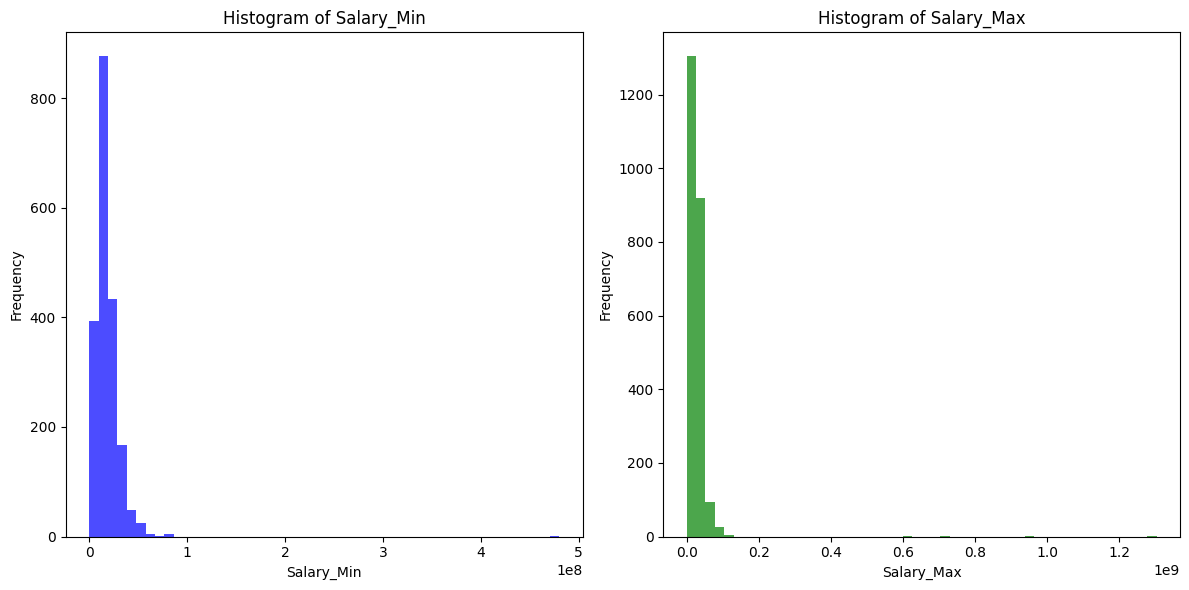

In [1075]:
#Vẽ biểu đồ histogram Salary_Min, Salary_Max
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data_API['Salary_Min'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Salary_Min')
plt.xlabel('Salary_Min')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(data_API['Salary_Max'].dropna(), bins=50, color='green', alpha=0.7)
plt.title('Histogram of Salary_Max')
plt.xlabel('Salary_Max')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Biểu đồ cho thấy phân phối về mức lương cả tối thiểu và tối đa đều lệch phải nặng, ta sẽ ưu tiên tiến hành xử lí giá trị rỗng bằng cách lấy theo giá trị trung vị cục bộ (lấy cho từng 'Role') nhằm tạo ra mức lương ở mức tham khảo khi thống kê đồng thời tránh hiện tượng outlier. Nếu toàn bộ nhóm 'Role' nào đó không có mức lương cụ thể thì điền giá trị -1:


In [1076]:
# Dữ liệu trước khi điền missing values
data_API[data_API['Salary_Min'].isnull() | data_API['Salary_Max'].isnull()][['Job_Title', 'Salary_Min', 'Salary_Max']].head(20)

,Job_Title,Salary_Min,Salary_Max
0,KỸ SƯ CẦU NỐI BRSE,NaN,NaN
1,NETWORK TECHNICAL SUPPORT SPECIALIST,NaN,NaN
5,SENIOR PRODUCT OWNER,NaN,NaN
6,FRONT-END DEVELOPER,NaN,NaN
10,CLOUD SYSTEM ENGINEER (GCP),NaN,NaN
11,GIẢNG VIÊN CÔNG NGHỆ THÔNG TIN / KHOA HỌC MÁY TÍNH,NaN,NaN
13,NHÂN VIÊN IT HELPDESK / IT SUPPORT,NaN,NaN
15,SOLUTION ARCHITECT,NaN,NaN
17,UNITY DEVELOPER (CASUAL/PUZZLE) - JUNIOR/MIDDLE,NaN,"38,250,000"
18,CHUYÊN VIÊN PHÁT TRIỂN HỆ THỐNG GIÁO DỤC SỐ EDTECH,NaN,"20,000,000"


In [1077]:
# Xử lí giá trị thiếu trong cột Salary_Min và Salary_Max bằng cách điền giá trị trung vị cục bộ theo 'Role', n
data_API['Salary_Min'] = data_API.groupby('Role')['Salary_Min'].transform(
    lambda x: x.fillna(x.median() if not x.dropna().empty else -1)  
)
data_API['Salary_Max'] = data_API.groupby('Role')['Salary_Max'].transform(
    lambda x: x.fillna(x.median() if not x.dropna().empty else -1)  
)
# Kiểm tra lại dữ liệu sau khi điền giá trị trung vị
data_API[data_API['Salary_Min'].isnull() | data_API['Salary_Max'].isnull()][['Job_Title','Role' ,'Salary_Min', 'Salary_Max', 'URL']]

,Job_Title,Role,Salary_Min,Salary_Max,URL


In [1078]:
data_API.describe().T

,count,mean,std,min,25%,50%,75%,max
First_Working_Day_Of_Week,"3,707",2,0,1,2,2,2,7
Last_Working_Day_Of_Week,"3,707",6,0,1,6,6,6,7
Total_Work_Hour,"3,212",46,2,16,45,45,48,56
Salary_Min,"4,176","16,577,879","10,686,949",-1,"12,000,000","15,000,000","20,000,000","480,000,000"
Salary_Max,"4,176","28,403,434","31,016,033",-1,"20,000,000","25,000,000","30,000,000","1,303,500,000"
Recruitment_Count,"4,176",2,4,1,1,1,2,100


In [1079]:
data_API.isnull().sum().sort_values(ascending=False)

Date_Crawl_Module_1          1200
Total_Work_Hour               964
Work_On_Sunday                577
Work_On_Saturday              550
First_Working_Day_Of_Week     469
Last_Working_Day_Of_Week      469
Deadline                      438
Company_Field                 167
Level                           1
Company_URL                     1
Job_Type                        1
Academic_Level                  1
Company_Name                    1
Job_Title                       0
Role                            0
URL                             0
Language                        0
Experience_Years                0
Tech_Stack                      0
Recruitment_Count               0
Salary_Max                      0
Salary_Min                      0
Province                        0
Programming_Language            0
Old_Job_Title                   0
dtype: int64

In [1080]:
#Hiển thị số tự nhiên không phải số khoa học
pd.options.display.float_format = '{:,.0f}'.format

In [1081]:
data_API[data_API['Salary_Max'] > data_API['Salary_Max'].mean()][['Job_Title', 'Salary_Min', 'Salary_Max', 'URL']].nlargest(20, 'Salary_Max')

,Job_Title,Salary_Min,Salary_Max,URL
51,.NET BACKEND ENGINEER,"17,010,000","1,303,500,000",https://www.topcv.vn/viec-lam/net-backend-engineer-senior-storefront-ecommerce-platform-total-annual-compensation-55-000/1590906.html?ta_source=ITJobs_LinkDetail
2395,"SENIOR DATA ENGINEER, GLOBAL E-COMMERCE DATA PLATFORM","20,000,000","960,000,000",https://www.topcv.vn/viec-lam/senior-data-engineer-global-e-commerce-data-platform-total-annual-income-40-000/1621988.html?ta_source=ITJobs_LinkDetail
48,"JUNIOR DATA ENGINEER, GLOBAL E-COMMERCE DATA PLATFORM","20,000,000","720,000,000",https://www.topcv.vn/viec-lam/junior-data-engineer-global-e-commerce-data-platform-total-annual-compensation-30-000/1653523.html?ta_source=ITJobs_LinkDetail
1848,LẬP TRÌNH VIÊN REACTJS,"480,000,000","600,000,000",https://www.topcv.vn/brand/iigvietnam/tuyen-dung/lap-trinh-vien-reactjs-j1655623.html?ta_source=ITJobs_LinkDetail
114,KỸ SƯ TRIỂN KHAI HỆ THỐNG PHẦN MỀM,"15,300,000","127,500,000",https://www.topcv.vn/viec-lam/ky-su-trien-khai-he-thong-phan-mem/1594619.html?ta_source=ITJobs_LinkDetail
2022,KỸ SƯ TRIỂN KHAI HẠ TẦNG CNTT,"15,300,000","127,500,000",https://www.topcv.vn/viec-lam/ky-su-trien-khai-ha-tang-cntt/1594646.html?ta_source=ITJobs_LinkDetail
1959,QA AUTOMATION ENGINEER,"25,440,000","127,200,000",https://www.topcv.vn/viec-lam/qa-automation-engineer/1697862.html?ta_source=ITJobs_LinkDetail
930,KỸ SƯ XỬ LÝ TÍN HIỆU,"17,010,000","125,850,000",https://www.topcv.vn/viec-lam/ky-su-xu-ly-tin-hieu/693347.html?ta_source=ITJobs_LinkDetail
319,CYBER SECURITY MANAGER,"85,750,000","102,800,000",https://www.topcv.vn/viec-lam/cyber-security-manager/1712238.html?ta_source=ITJobs_LinkDetail
1413,NATURAL LANGUAGE PROCESSING ENGINEER,"25,400,000","101,600,000",https://www.topcv.vn/viec-lam/natural-language-processing-engineer/1703834.html?ta_source=ITJobs_LinkDetail


Một số mức lương cao bất thường, đó là do đang tính tổng thu nhập trong 1 năm thay vì 1 tháng như các ngành khác

### Xử lí Programming_Language và Tech_Stack

In [1082]:
data_API[data_API['Programming_Language'].isnull() & data_API['Tech_Stack'].isnull()][['Role', 'Job_Title', 'Programming_Language', 'Tech_Stack', 'URL']].sort_values(by='Role')

,Role,Job_Title,Programming_Language,Tech_Stack,URL


In [1083]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           4186 non-null   int64 
 1   Job_Title            4186 non-null   object
 2   Description          4186 non-null   object
 3   Role                 4186 non-null   object
 4   Time_Range           4186 non-null   object
 5   Skills               4186 non-null   object
 6   Location_Detail      4186 non-null   object
 7   Province             4186 non-null   object
 8   Experience_Years     4186 non-null   object
 9   Salary               4186 non-null   object
 10  Company_Name         4186 non-null   object
 11  Company_URL          4186 non-null   object
 12  Job_Type             4186 non-null   object
 13  Deadline             4186 non-null   object
 14  Academic_Level       4186 non-null   object
 15  Benefits             4186 non-null   object
 16  Level 

Do việc đáp ứng nhu cầu tuyển dụng chủ yếu dựa vào Tech_Stack và Programming_Language, thế nên ta sẽ xem chi tiết các mẫu dữ liệu bị thiếu ở cả 2 trường này không và tiến hành xử lí null

In [1084]:
#Check các mẫu dữ liệu không có giá trị ở mục 'Tech_Stack'
tech_pro = data_API[data_API['Tech_Stack'].isnull() | data_API['Programming_Language'].isnull()][['Job_Title','Tech_Stack', 'Programming_Language', 'URL', 'Recruitment_Count', 'Role']]
print(f"Số mẫu dữ liệu bị null ở mục 'Tech_Stack' (không null ở 'Programming_Language') là: {tech_pro[tech_pro['Programming_Language'].notnull() & tech_pro['Tech_Stack'].isnull()].shape[0]}")
print(f"Số mẫu dữ liệu bị null ở mục 'Programming_Language' (không null ở 'Tech_Stack') là: {tech_pro[tech_pro['Programming_Language'].isnull() & tech_pro['Tech_Stack'].notnull()].shape[0]}")
print(f"Số mẫu dữ liệu bị null ở cả 2 mục 'Tech_Stack' và 'Programming_Language' là: {tech_pro[tech_pro['Programming_Language'].isnull() & tech_pro['Tech_Stack'].isnull()].shape[0]}")

Số mẫu dữ liệu bị null ở mục 'Tech_Stack' (không null ở 'Programming_Language') là: 0
Số mẫu dữ liệu bị null ở mục 'Programming_Language' (không null ở 'Tech_Stack') là: 0
Số mẫu dữ liệu bị null ở cả 2 mục 'Tech_Stack' và 'Programming_Language' là: 0


In [1085]:
# Số mẫu dữ liệu có giá trị ở mục 'Tech_Stack' và 'Programming_Language'
tech_pro[tech_pro['Programming_Language'].isnull() & tech_pro['Tech_Stack'].isnull()]['Role'].value_counts()

Series([], Name: count, dtype: int64)

In [1086]:
data_bronze = pd.read_csv(r'D:\Python_code\DS108_Đồ_án\297_records_data_bronze.csv')

#### Kiểm tra các mấu tin tuyển dụng trống cả 2 trường Tech_Stack và Programming_Language

In [1087]:
data_bronze[data_bronze['Role'] == 'Business Analyst (Phân tích nghiệp vụ)'][['Role','Skills', 'URL']]

,Role,Skills,URL
27,Business Analyst (Phân tích nghiệp vụ),"Phân Tích Nghiệp Vụ, Thu Thập Và Phân Tích Dữ Liệu, Viết Tài Liệu (soạn Thảo Báo Cáo, Tài Liệu Yêu Cầu), Giao Tiếp Hiệu Quả (trình Bày, Thuyết Trình), Mô Hình Hóa Quy Trình Nghiệp Vụ",https://www.topcv.vn/viec-lam/chuyen-vien-phan-tich-nghiep-vu-business-analyst/1707395.html?ta_source=ITJobs_LinkDetail
38,Business Analyst (Phân tích nghiệp vụ),"Viết Báo Cáo, Phân Tích Nghiệp Vụ, Warehouse, Mô Hình Hóa Dữ Liệu, Thu Thập Và Phân Tích Dữ Liệu, Trình Bày Ý Tưởng",https://www.topcv.vn/viec-lam/chuyen-vien-business-analyst-ba-2-nam-kinh-nghiem-thu-nhap-upto-25-trieu-tai-ha-noi/1710492.html?ta_source=ITJobs_LinkDetail
40,Business Analyst (Phân tích nghiệp vụ),Null,https://www.topcv.vn/viec-lam/business-analyst-luong-upto-25/1708073.html?ta_source=ITJobs_LinkDetail
63,Business Analyst (Phân tích nghiệp vụ),"Làm việc nhóm, Tiếng Pháp, Tiếng Đức, kỹ năng giao tiếp tốt, Khả Năng Phân Tích Và Giải Quyết Vấn Đề, Kiến Thức Cơ Bản Về Sap, Tiếng Pháp Hoặc Tiếng Đức (trình Độ Lưu Loát)",https://www.topcv.vn/viec-lam/fresher-sap-functional-tieng-phap-tieng-duc/1674144.html?ta_source=ITJobs_LinkDetail
87,Business Analyst (Phân tích nghiệp vụ),Null,https://www.topcv.vn/viec-lam/it-business-analyst-hcm-va-ha-noi/1703440.html?ta_source=ITJobs_LinkDetail
152,Business Analyst (Phân tích nghiệp vụ),"Phân Tích Nghiệp Vụ, Mô Hình Hóa Dữ Liệu, Thu Thập Và Phân Tích Dữ Liệu, Hiểu Biết Về Ai Và Machine Learning, Thiết Kế Và Phát Triển Chatbot",https://www.topcv.vn/viec-lam/business-analyst-chatbot-ai/1711626.html?ta_source=ITJobs_LinkDetail
164,Business Analyst (Phân tích nghiệp vụ),Null,https://www.topcv.vn/viec-lam/business-analyst-tu-2-nam-kinh-nghiem/1279031.html?ta_source=ITJobs_LinkDetail
165,Business Analyst (Phân tích nghiệp vụ),"Phân Tích Nghiệp Vụ, Thu Thập Và Phân Tích Dữ Liệu, Mô Hình Hóa Quy Trình Nghiệp Vụ, Viết Tài Liệu (soạn Thảo Báo Cáo, Tài Liệu Yêu Cầu), Giao Tiếp Hiệu Quả (trình Bày, Thuyết Trình)",https://www.topcv.vn/viec-lam/chuyen-vien-phan-tich-nghiep-vu-business-analyst/1713562.html?ta_source=ITJobs_LinkDetail
171,Business Analyst (Phân tích nghiệp vụ),"Phân tích dữ liệu, Mô Hình Hóa Dữ Liệu, Quản Lý Dự Án, Giao tiếp hiệu quả, Kỹ Năng Trình Bày",https://www.topcv.vn/viec-lam/business-analyst-operations/1713474.html?ta_source=ITJobs_LinkDetail
175,Business Analyst (Phân tích nghiệp vụ),"Phân Tích Nghiệp Vụ, Thu Thập Và Phân Tích Dữ Liệu, Xây Dựng Mô Hình Nghiệp Vụ, Viết Báo Cáo, Trình Bày Ý Tưởng",https://www.topcv.vn/viec-lam/business-analyst-english/1713497.html?ta_source=ITJobs_LinkDetail


In [1088]:
data_bronze[data_bronze['Role'] == 'Product Owner/Product Manager'][['Role','Skills', 'URL']]

,Role,Skills,URL
5,Product Owner/Product Manager,"Product Manager, Product Owner, Quản Lý Sản Phẩm",https://www.topcv.vn/brand/topcv/tuyen-dung/senior-product-owner-j734969.html?ta_source=ITJobs_LinkDetail
19,Product Owner/Product Manager,"AI, Quản Lý Sản Phẩm, Thu Thập Và Phân Tích Dữ Liệu, Xây Dựng Chiến Lược Sản Phẩm, Quản Lý Roadmap Sản Phẩm",https://www.topcv.vn/brand/educa/tuyen-dung/product-owner-product-manager-san-pham-ai-learning-j1627339.html?ta_source=ITJobs_LinkDetail
22,Product Owner/Product Manager,"Quản Lý Sản Phẩm, chiến lược sản phẩm, Phân Tích Thị Trường, Quản Lý Dự Án, Lập Kế Hoạch Sản Phẩm",https://www.topcv.vn/viec-lam/giam-doc-san-pham-product-director-crm-hrm/1712076.html?ta_source=ITJobs_LinkDetail
97,Product Owner/Product Manager,"Quản Lý Dự Án, phân tích yêu cầu, Kiểm soát rủi ro, Lập Kế Hoạch Dự Án, Theo Dõi Tiến Độ Dự Án",https://www.topcv.vn/viec-lam/chuyen-vien-van-hanh-du-an-web-app-mobile-product-app-ops-q7/1696793.html?ta_source=ITJobs_LinkDetail
153,Product Owner/Product Manager,"It Phần Mềm, Công Nghệ Thông Tin",https://www.topcv.vn/viec-lam/pho-phong-trien-khai-phan-mem-ai/1416460.html?ta_source=ITJobs_LinkDetail
243,Product Owner/Product Manager,"Kỹ năng giao tiếp, Làm việc nhóm, Phân tích dữ liệu, Nghiên Cứu Thị Trường, Quản Lý Dự Án",https://www.topcv.vn/viec-lam/product-management-assistant/1713422.html?ta_source=ITJobs_LinkDetail
248,Product Owner/Product Manager,"Quản Lý Dự Án, Quản Lý Sản Phẩm, Giao tiếp hiệu quả",https://www.topcv.vn/viec-lam/product-manager/1712754.html?ta_source=ITJobs_LinkDetail


In [1089]:
data_bronze[data_bronze['Role'] == 'Công nghệ thông tin khác'][['Role','Skills', 'URL']]

,Role,Skills,URL
9,Công nghệ thông tin khác,"Lập Kế Hoạch Dự Án, Quản Lý Rủi Ro Dự Án, Quản Lý Chi Phí Dự Án, Phân Tích Yêu Cầu Dự Án, Kiểm Soát Chất Lượng Dự Án",https://www.topcv.vn/viec-lam/chuyen-vien-tham-dinh-du-an-cong-nghe-thong-tin/1669225.html?ta_source=ITJobs_LinkDetail
11,Công nghệ thông tin khác,"Android, CSS, HTML, Java, Javascript, Giảng dạy, Lập Trình",https://www.topcv.vn/viec-lam/giang-vien-cong-nghe-thong-tin-khoa-hoc-may-tinh/1334503.html?ta_source=ITJobs_LinkDetail
18,Công nghệ thông tin khác,Null,https://www.topcv.vn/viec-lam/chuyen-vien-phat-trien-he-thong-giao-duc-so-edtech-nghi-thu-7-chu-nhat-thu-nhap-hap-dan/1705124.html?ta_source=ITJobs_LinkDetail
62,Công nghệ thông tin khác,"Giải quyết vấn đề, Kiểm thử phần mềm, Phân Tích Và Thiết Kế Hệ Thống, Quản Lý Dự Án Phần Mềm, Lập Trình (ít Nhất 1 Ngôn Ngữ)",https://www.topcv.vn/viec-lam/academic-specialist-of-ict-programmes/1667906.html?ta_source=ITJobs_LinkDetail
86,Công nghệ thông tin khác,"Khả năng giải quyết vấn đề, Khả Năng Làm Việc Nhóm, Hiểu Biết Về Cơ Sở Dữ Liệu Quan Hệ (sql), Kiến Thức Cơ Bản Về Lập Trình Hướng Đối Tượng (oop), Thành Thạo Ít Nhất Một Ngôn Ngữ Lập Trình (java, C++, Python, C#...)",https://www.topcv.vn/viec-lam/thuc-tap-sinh-seo/1704208.html?ta_source=ITJobs_LinkDetail
125,Công nghệ thông tin khác,Null,https://www.topcv.vn/viec-lam/ai-junior/1694954.html?ta_source=ITJobs_LinkDetail
130,Công nghệ thông tin khác,Null,https://www.topcv.vn/viec-lam/java-developer-sql-spring-reactjs/1645453.html?ta_source=ITJobs_LinkDetail
159,Công nghệ thông tin khác,"Triển Khai Phần Mềm, Quản Lý Phiên Bản (git), Kiểm thử phần mềm, Cài Đặt Và Cấu Hình Hệ Thống, Khắc phục sự cố",https://www.topcv.vn/viec-lam/nhan-vien-trien-khai-phan-mem/1713638.html?ta_source=ITJobs_LinkDetail
178,Công nghệ thông tin khác,"ERP, Javascript, Làm việc nhóm",https://www.topcv.vn/viec-lam/nhan-vien-it/1712688.html?ta_source=ITJobs_LinkDetail
245,Công nghệ thông tin khác,"Điện Tử, Mạng máy tính",https://www.topcv.vn/viec-lam/ky-su-cong-nghe/1452278.html?ta_source=ITJobs_LinkDetail


In [1090]:
data_API[data_API['Programming_Language'].isnull() & data_API['Tech_Stack'].isnull() & (data_API['Role'] == 'Business Analyst (Phân tích nghiệp vụ)')][['Role', 'Job_Title', 'Programming_Language', 'Tech_Stack', 'URL']].sort_values(by='Role').head(20)

,Role,Job_Title,Programming_Language,Tech_Stack,URL


Vì trường Skills  có dữ liệu không nhất quán đối với các công việc không yêu cầu về vấn đề kĩ thuật, ta xử lí trường hợp NULL ở cả 2 trường tech stack và programming language bằng cách điền -1 vào nhằm bảo toàn số lượng tin đăng tuyển dụng mà không phải loại bỏ

Nhận thấy phần lớn các role không đặt nặng yêu cầu tuyển dụng về công nghệ sử dụng và ngôn ngữ lập trình hầu hết là quản lí dự án, phân tích nghiệp vụ, tester và nhân viên IT kĩ thuật nói chung. Ta sẽ điền giá trị 'UNKNOWN' 

In [1091]:
data_API['Programming_Language'] = data_API['Programming_Language'].fillna('UNKNOWN') # Điền giá trị 'UNKNOWN' vào các ô đã được chuyển kiểu thành string
data_API['Programming_Language'] = data_API['Programming_Language'].apply(lambda x: [x] if isinstance(x, str) else x) # Chuyển đổi giá trị ở dạng string thành list để đảm bảo tính nhất quán
data_API['Tech_Stack'] = data_API['Tech_Stack'].fillna('UNKNOWN')# Điền giá trị 'UNKNOWN' vào các ô đã được chuyển kiểu thành string
data_API['Tech_Stack'] = data_API['Tech_Stack'].apply(lambda x: [x] if isinstance(x, str) else x) # Chuyển đổi giá trị ở dạng string thành list để đảm bảo tính nhất quán
# Kiểm tra lại dữ liệu sau khi điền giá trị 'UNKNOWN'
data_API[data_API['Programming_Language'].isnull() | data_API['Tech_Stack'].isnull()][['Job_Title', 'Programming_Language', 'Tech_Stack', 'URL']] 
data_API.isnull().sum().sort_values(ascending=False)

Date_Crawl_Module_1          1200
Total_Work_Hour               964
Work_On_Sunday                577
Work_On_Saturday              550
First_Working_Day_Of_Week     469
Last_Working_Day_Of_Week      469
Deadline                      438
Company_Field                 167
Level                           1
Company_URL                     1
Job_Type                        1
Academic_Level                  1
Company_Name                    1
Job_Title                       0
Role                            0
URL                             0
Language                        0
Experience_Years                0
Tech_Stack                      0
Recruitment_Count               0
Salary_Max                      0
Salary_Min                      0
Province                        0
Programming_Language            0
Old_Job_Title                   0
dtype: int64

In [1092]:
data_API['Programming_Language'].apply(type).value_counts()

Programming_Language
<class 'list'>    4176
Name: count, dtype: int64


- Có khoảng 341 thông tin tuyển dụng yêu cầu kĩ năng khác, không yêu cầu kĩ năng liên quan nhiều tới technical. 
- Cần xử lý trường hợp cả hai trường đều bị thiếu giá trị trong một mẫu dữ liệu. Lúc này dòng dữ liệu sẽ không còn mang ý nghĩa nhiều vì thiếu 2 trường quan trọng thể hiện nhiều nhất nhu cầu tuyển dụng

### Xử lí dữ liệu thời gian làm việc trong tuần lần lượt theo thứ tự 1 -> 2 -> 3:
1. ['Work_On_Saturday', 'Work_On_Sunday'] 
2. ['First_Working_Day_Of_Week', 'Last_Working_Day_Of_Week'] 
3. ['Total_Work_Hour']

In [1093]:
data_API.isnull().sum().sort_values(ascending=False)

Date_Crawl_Module_1          1200
Total_Work_Hour               964
Work_On_Sunday                577
Work_On_Saturday              550
First_Working_Day_Of_Week     469
Last_Working_Day_Of_Week      469
Deadline                      438
Company_Field                 167
Level                           1
Company_URL                     1
Job_Type                        1
Academic_Level                  1
Company_Name                    1
Job_Title                       0
Role                            0
URL                             0
Language                        0
Experience_Years                0
Tech_Stack                      0
Recruitment_Count               0
Salary_Max                      0
Salary_Min                      0
Province                        0
Programming_Language            0
Old_Job_Title                   0
dtype: int64

In [1094]:
data_API[['First_Working_Day_Of_Week', 'Last_Working_Day_Of_Week', 'Work_On_Saturday', 'Work_On_Sunday']].isnull().sum()

First_Working_Day_Of_Week    469
Last_Working_Day_Of_Week     469
Work_On_Saturday             550
Work_On_Sunday               577
dtype: int64

#### Xử lí 'Work_On_Saturday', 'Work_On_Sunday'

In [1095]:
# Xem các tin tuyển dụng được xác định trong bộ dữ liệu có nghỉ Thứ 7/CN
data_API[(data_API['Work_On_Saturday'].notnull()) | (data_API['Work_On_Sunday'].notnull())][['Job_Title', 'Company_Name', 'Work_On_Saturday','Work_On_Sunday', 'URL']].head(20)

,Job_Title,Company_Name,Work_On_Saturday,Work_On_Sunday,URL
0,KỸ SƯ CẦU NỐI BRSE,CÔNG TY TNHH LG CNS VIỆT NAM,False,False,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail
3,LẬP TRÌNH VIÊN BACKEND JAVA,CÔNG TY CỔ PHẦN SIMBATECH,False,False,https://www.topcv.vn/viec-lam/lap-trinh-vien-backend-java-thu-nhap-tu-16-32-trieu-nghi-thu-7-chu-nhat/1713501.html?ta_source=ITJobs_LinkDetail
4,CHUYÊN VIÊN KIỂM THỬ PHẦN MỀM TESTER,CÔNG TY CỔ PHẦN SIMBATECH,False,False,https://www.topcv.vn/viec-lam/chuyen-vien-kiem-thu-phan-mem-tester-thu-nhap-tu-16-32-trieu-nghi-thu-7-chu-nhat/1713391.html?ta_source=ITJobs_LinkDetail
5,SENIOR PRODUCT OWNER,CÔNG TY CỔ PHẦN TOPCV VIỆT NAM,False,False,https://www.topcv.vn/brand/topcv/tuyen-dung/senior-product-owner-j734969.html?ta_source=ITJobs_LinkDetail
6,FRONT-END DEVELOPER,CÔNG TY TNHH HIVELAB VINA,False,False,https://www.topcv.vn/viec-lam/front-end-developer/1713259.html?ta_source=ITJobs_LinkDetail
7,LẬP TRÌNH VIÊN VBA,CÔNG TY TNHH DIGI-TEXX,False,False,https://www.topcv.vn/viec-lam/lap-trinh-vien-vba-quan-4-tphcm/1501471.html?ta_source=ITJobs_LinkDetail
9,CHUYÊN VIÊN THẨM ĐỊNH DỰ ÁN CÔNG NGHỆ THÔNG TIN,TỔNG CÔNG TY BƯU ĐIỆN VIỆT NAM,False,False,https://www.topcv.vn/viec-lam/chuyen-vien-tham-dinh-du-an-cong-nghe-thong-tin/1669225.html?ta_source=ITJobs_LinkDetail
10,CLOUD SYSTEM ENGINEER (GCP),CÔNG TY TNHH LG CNS VIỆT NAM,False,False,https://www.topcv.vn/viec-lam/cloud-system-engineer-gcp/1705395.html?ta_source=ITJobs_LinkDetail
12,KỸ SƯ IT INFRASTRUCTURE,CÔNG TY TNHH AUO VIỆT NAM,True,False,https://www.topcv.vn/viec-lam/ky-su-it-infrastructure-tieng-trung-13-25-trieu/1652778.html?ta_source=ITJobs_LinkDetail
13,NHÂN VIÊN IT HELPDESK / IT SUPPORT,CÔNG TY TNHH HAIVINA KIM LIÊN,True,False,https://www.topcv.vn/viec-lam/nhan-vien-it-helpdesk-it-support-nhan-viec-ngay-tai-nghe-an/1708637.html?ta_source=ITJobs_LinkDetail


In [1096]:
# Xem các tin tuyển dụng không được xác định trong bộ dữ liệu có nghỉ Thứ 7/CN
data_API[data_API['Work_On_Saturday'].isnull() | data_API['Work_On_Sunday'].isnull()][['Job_Title', 'First_Working_Day_Of_Week','Last_Working_Day_Of_Week','Work_On_Saturday', 'Work_On_Sunday','Total_Work_Hour', 'URL']].head(20)

,Job_Title,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,URL
1,NETWORK TECHNICAL SUPPORT SPECIALIST,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail
2,GAMING SOP DESIGNER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/gaming-sop-designer/1704685.html?ta_source=ITJobs_LinkDetail
8,NHÂN VIÊN QUẢN TRỊ HỆ THỐNG AN NINH MẠNG,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/nhan-vien-quan-tri-he-thong-an-ninh-mang-thu-nhap-up-to-22-trieu-tai-kcn-me-linh-ha-noi/1702346.html?ta_source=ITJobs_LinkDetail
11,GIẢNG VIÊN CÔNG NGHỆ THÔNG TIN / KHOA HỌC MÁY TÍNH,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/giang-vien-cong-nghe-thong-tin-khoa-hoc-may-tinh/1334503.html?ta_source=ITJobs_LinkDetail
14,GAMING CHANNEL EDITOR,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/gaming-channel-editor/1704696.html?ta_source=ITJobs_LinkDetail
20,GIẢNG VIÊN ĐÀO TẠO BLOCKCHAIN/AI,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/giang-vien-dao-tao-blockchain-ai-luong-khoi-diem-25-trieu-den-65-trieu-tro-cap-thuong/1708419.html?ta_source=ITJobs_LinkDetail
35,AI ENGINEER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/ai-engineer-tu-1-nam-kinh-nghiem-thu-nhap-17-25-trieu-thang/1695005.html?ta_source=ITJobs_LinkDetail
37,LẬP TRÌNH PHP,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/lap-trinh-php-up-to-1000-tuy-kha-nang/1710562.html?ta_source=ITJobs_LinkDetail
45,"QUẢN TRỊ HỆ THỐNG (SA) SYSTEM ENGINEER, LINUX, DBA",NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/quan-tri-he-thong-sa-system-engineer-linux-dba/1002884.html?ta_source=ITJobs_LinkDetail
46,IT SUPPORT - SENIOR EXECUTIVE,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/it-support-senior-executive-good-english/1698753.html?ta_source=ITJobs_LinkDetail


#### Xử lí 'First_Working_Day_Of_Week', 'Last_Working_Day_Of_Week'

In [1097]:
data_API[data_API['First_Working_Day_Of_Week'].isnull() | data_API['Last_Working_Day_Of_Week'].isnull()][['Job_Title', 'First_Working_Day_Of_Week', 'Last_Working_Day_Of_Week','Work_On_Saturday', 'Work_On_Sunday','Total_Work_Hour', 'URL']]

,Job_Title,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,URL
1,NETWORK TECHNICAL SUPPORT SPECIALIST,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail
2,GAMING SOP DESIGNER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/gaming-sop-designer/1704685.html?ta_source=ITJobs_LinkDetail
8,NHÂN VIÊN QUẢN TRỊ HỆ THỐNG AN NINH MẠNG,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/nhan-vien-quan-tri-he-thong-an-ninh-mang-thu-nhap-up-to-22-trieu-tai-kcn-me-linh-ha-noi/1702346.html?ta_source=ITJobs_LinkDetail
11,GIẢNG VIÊN CÔNG NGHỆ THÔNG TIN / KHOA HỌC MÁY TÍNH,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/giang-vien-cong-nghe-thong-tin-khoa-hoc-may-tinh/1334503.html?ta_source=ITJobs_LinkDetail
14,GAMING CHANNEL EDITOR,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/gaming-channel-editor/1704696.html?ta_source=ITJobs_LinkDetail
...,...,...,...,...,...,...,...
4135,NHÂN VIÊN IT,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/nhan-vien-it/734949.html?ta_source=ITJobs_LinkDetail
4140,C++ DEVELOPER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/c-developer/1631312.html?ta_source=ITJobs_LinkDetail
4153,CHUYÊN VIÊN PHÁT TRIỂN PHẦN MỀM MOBILE DEVELOPER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/chuyen-vien-phat-trien-phan-mem-mobile-developer/1632839.html?ta_source=ITJobs_LinkDetail
4173,CHUYÊN VIÊN PHÂN TÍCH DỮ LIỆU BẤT ĐỘNG SẢN ÚC,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/chuyen-vien-phan-tich-du-lieu-bat-dong-san-uc/1618623.html?ta_source=ITJobs_LinkDetail


Các mẫu dữ liệu trên không được cung cấp ngày làm việc cụ thể trong link tuyển dụng gốc, đồng thời 2 thuộc tính Work_On_Saturday và Work_On_Sunday đưa ra giá trị mặc định chưa chuẩn (Vì nếu không có thông tin thì phải trả về None) --> Đang điều chỉnh cách prompt

#### Xử lí Total_Work_Hour

In [1098]:
col_display = ['Job_Title', 'Total_Work_Hour', 'URL']
data_API[col_display].head(200)

,Job_Title,Total_Work_Hour,URL
0,KỸ SƯ CẦU NỐI BRSE,40,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail
1,NETWORK TECHNICAL SUPPORT SPECIALIST,NaN,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail
2,GAMING SOP DESIGNER,NaN,https://www.topcv.vn/viec-lam/gaming-sop-designer/1704685.html?ta_source=ITJobs_LinkDetail
3,LẬP TRÌNH VIÊN BACKEND JAVA,48,https://www.topcv.vn/viec-lam/lap-trinh-vien-backend-java-thu-nhap-tu-16-32-trieu-nghi-thu-7-chu-nhat/1713501.html?ta_source=ITJobs_LinkDetail
4,CHUYÊN VIÊN KIỂM THỬ PHẦN MỀM TESTER,48,https://www.topcv.vn/viec-lam/chuyen-vien-kiem-thu-phan-mem-tester-thu-nhap-tu-16-32-trieu-nghi-thu-7-chu-nhat/1713391.html?ta_source=ITJobs_LinkDetail
...,...,...,...
195,SENIOR FRONTEND DEVELOPER,54,https://www.topcv.vn/viec-lam/senior-frontend-developer/1713227.html?ta_source=ITJobs_LinkDetail
196,THỰC TẬP SINH PHÁT TRIỂN PHẦN MỀM (AI),NaN,https://www.topcv.vn/brand/fptis/tuyen-dung/thuc-tap-sinh-phat-trien-phan-mem-ai-j1713748.html?ta_source=ITJobs_LinkDetail
197,LẬP TRÌNH MOBILE ANDROID NATIVE (KOTLIN / JAVA),45,https://www.topcv.vn/viec-lam/lap-trinh-mobile-android-native-kotlin-java/1666036.html?ta_source=ITJobs_LinkDetail
198,SENIOR DATA ENGINEER,45,https://www.topcv.vn/viec-lam/senior-data-engineer-english/1713190.html?ta_source=ITJobs_LinkDetail


In [1099]:
#Kiểm tra các mẫu dữ liệu không có giá trị ở mục 'Total_Work_Hour'
data_API[data_API['Total_Work_Hour'].isnull()][['Job_Title', 'First_Working_Day_Of_Week','Last_Working_Day_Of_Week','Work_On_Saturday', 'Work_On_Sunday','Total_Work_Hour', 'URL']]

,Job_Title,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,URL
1,NETWORK TECHNICAL SUPPORT SPECIALIST,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail
2,GAMING SOP DESIGNER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/gaming-sop-designer/1704685.html?ta_source=ITJobs_LinkDetail
8,NHÂN VIÊN QUẢN TRỊ HỆ THỐNG AN NINH MẠNG,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/nhan-vien-quan-tri-he-thong-an-ninh-mang-thu-nhap-up-to-22-trieu-tai-kcn-me-linh-ha-noi/1702346.html?ta_source=ITJobs_LinkDetail
11,GIẢNG VIÊN CÔNG NGHỆ THÔNG TIN / KHOA HỌC MÁY TÍNH,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/giang-vien-cong-nghe-thong-tin-khoa-hoc-may-tinh/1334503.html?ta_source=ITJobs_LinkDetail
14,GAMING CHANNEL EDITOR,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/gaming-channel-editor/1704696.html?ta_source=ITJobs_LinkDetail
...,...,...,...,...,...,...,...
4155,NHÂN VIÊN KIỂM THỬ PHẦN MỀM MANUAL TESTER,2,6,True,False,NaN,https://www.topcv.vn/viec-lam/nhan-vien-kiem-thu-phan-mem-manual-tester/1328504.html?ta_source=ITJobs_LinkDetail
4161,GAME DEVELOPER,2,6,True,False,NaN,https://www.topcv.vn/viec-lam/game-developer/1609037.html?ta_source=ITJobs_LinkDetail
4173,CHUYÊN VIÊN PHÂN TÍCH DỮ LIỆU BẤT ĐỘNG SẢN ÚC,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/chuyen-vien-phan-tich-du-lieu-bat-dong-san-uc/1618623.html?ta_source=ITJobs_LinkDetail
4174,NHÂN VIÊN IT (IT SUPPORT / IT HELPDESK),2,6,True,False,NaN,https://www.topcv.vn/viec-lam/nhan-vien-it-it-support-it-helpdesk/1672404.html?ta_source=ITJobs_LinkDetail


In [1100]:
#Kiểm tra các mẫu dữ liệu không có giá trị ở mục 'Total_Work_Hour' và không có giá trị ở mục 'First_Working_Day_Of_Week' và 'Last_Working_Day_Of_Week'
data_API[data_API['Total_Work_Hour'].isnull() & data_API['First_Working_Day_Of_Week'].isnull() & data_API['Last_Working_Day_Of_Week'].isnull()][['Job_Title', 'First_Working_Day_Of_Week','Last_Working_Day_Of_Week','Work_On_Saturday', 'Work_On_Sunday','Total_Work_Hour', 'URL']]

,Job_Title,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,URL
1,NETWORK TECHNICAL SUPPORT SPECIALIST,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail
2,GAMING SOP DESIGNER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/gaming-sop-designer/1704685.html?ta_source=ITJobs_LinkDetail
8,NHÂN VIÊN QUẢN TRỊ HỆ THỐNG AN NINH MẠNG,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/nhan-vien-quan-tri-he-thong-an-ninh-mang-thu-nhap-up-to-22-trieu-tai-kcn-me-linh-ha-noi/1702346.html?ta_source=ITJobs_LinkDetail
11,GIẢNG VIÊN CÔNG NGHỆ THÔNG TIN / KHOA HỌC MÁY TÍNH,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/giang-vien-cong-nghe-thong-tin-khoa-hoc-may-tinh/1334503.html?ta_source=ITJobs_LinkDetail
14,GAMING CHANNEL EDITOR,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/gaming-channel-editor/1704696.html?ta_source=ITJobs_LinkDetail
...,...,...,...,...,...,...,...
4135,NHÂN VIÊN IT,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/nhan-vien-it/734949.html?ta_source=ITJobs_LinkDetail
4140,C++ DEVELOPER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/c-developer/1631312.html?ta_source=ITJobs_LinkDetail
4153,CHUYÊN VIÊN PHÁT TRIỂN PHẦN MỀM MOBILE DEVELOPER,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/chuyen-vien-phat-trien-phan-mem-mobile-developer/1632839.html?ta_source=ITJobs_LinkDetail
4173,CHUYÊN VIÊN PHÂN TÍCH DỮ LIỆU BẤT ĐỘNG SẢN ÚC,NaN,NaN,None,None,NaN,https://www.topcv.vn/viec-lam/chuyen-vien-phan-tich-du-lieu-bat-dong-san-uc/1618623.html?ta_source=ITJobs_LinkDetail


In [1101]:
#Kiểm tra các mẫu dữ liệu không có giá trị ở mục 'Total_Work_Hour' và có giá trị ở mục 'First_Working_Day_Of_Week' và 'Last_Working_Day_Of_Week'
data_API[data_API['Total_Work_Hour'].isnull() & data_API['First_Working_Day_Of_Week'].notnull() & data_API['Last_Working_Day_Of_Week'].notnull()][['Job_Title', 'Role','First_Working_Day_Of_Week','Last_Working_Day_Of_Week','Work_On_Saturday', 'Work_On_Sunday','Total_Work_Hour', 'URL']]

,Job_Title,Role,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,URL
25,MOBILE APP DEVELOPER (REACT NATIVE),MOBILE DEVELOPER,2,6,True,False,NaN,https://www.topcv.vn/viec-lam/mobile-app-developer-react-native/1692702.html?ta_source=ITJobs_LinkDetail
29,CHUYÊN VIÊN GIẢI PHÁP,FULLSTACK DEVELOPER,2,6,False,False,NaN,https://www.topcv.vn/viec-lam/chuyen-vien-giai-phap-nghi-thu-7-chu-nhat-thu-nhap-hap-dan/1705099.html?ta_source=ITJobs_LinkDetail
43,LẬP TRÌNH VIÊN VUEJS/ANGULAR,SOFTWARE ENGINEER,2,6,False,False,NaN,https://www.topcv.vn/viec-lam/lap-trinh-vien-vuejs-angular-thu-nhap-hap-dan-di-lam-ngay/1636624.html?ta_source=ITJobs_LinkDetail
50,IT HELPDESK ENGINEER / IT SUPPORT / INFORMATION TECHNOLOGY/ CÔNG NGHỆ THÔNG TIN CNTT,IT HELPDESK/IT SUPPORT,2,6,False,False,NaN,https://www.topcv.vn/viec-lam/it-helpdesk-engineer-it-support-information-technology-cong-nghe-thong-tin-cntt-tai-ha-noi-thu-nhap-hap-dan/1706519.html?ta_source=ITJobs_LinkDetail
58,QUẢN TRỊ DỰ ÁN TRIỂN KHAI PHẦN MỀM,IT PROJECT MANAGER,2,6,False,False,NaN,https://www.topcv.vn/viec-lam/quan-tri-du-an-trien-khai-phan-mem-thu-nhap-upto-40-trieu-dong/1177532.html?ta_source=ITJobs_LinkDetail
...,...,...,...,...,...,...,...,...
4146,DEVOPS ENGINEER (SENIOR),DEVOPS ENGINEER,2,6,False,False,NaN,https://www.topcv.vn/viec-lam/devops-engineer-senior-lam-viec-hybrid/1417422.html?ta_source=ITJobs_LinkDetail
4150,LẬP TRÌNH VIÊN ANGULAR /C#,SOFTWARE ENGINEER,2,6,False,False,NaN,https://www.topcv.vn/viec-lam/lap-trinh-vien-angular-c-di-lam-ngay/1439939.html?ta_source=ITJobs_LinkDetail
4155,NHÂN VIÊN KIỂM THỬ PHẦN MỀM MANUAL TESTER,CÔNG NGHỆ THÔNG TIN KHÁC,2,6,True,False,NaN,https://www.topcv.vn/viec-lam/nhan-vien-kiem-thu-phan-mem-manual-tester/1328504.html?ta_source=ITJobs_LinkDetail
4161,GAME DEVELOPER,GAME DEVELOPER,2,6,True,False,NaN,https://www.topcv.vn/viec-lam/game-developer/1609037.html?ta_source=ITJobs_LinkDetail


Nhìn chung, Total_Work_Hour	còn thiếu nhiều giá trị dữ liệu có phần lớn liên quan tới ngày đi làm trong tuần (First_Working_Day_Of_Week và Last_Working_Day_Of_Week). Nếu giá trị ngày đi làm bị thiếu thì khả năng cao không tồn tại giá trị tương ứng cho mẫu dữ liệu đó ở trường Total_Work_Hour -> Missing at random

Chuyển đổi 'First_Working_Day_Of_Week', 'Last_Working_Day_Of_Week' thành biến categorical và xem ngày đi làm phổ biến nhất

In [1102]:
data_working_day = data_API[['First_Working_Day_Of_Week', 'Last_Working_Day_Of_Week', 'Work_On_Saturday', 'Work_On_Sunday']].copy()
# Chuyển đổi các giá trị 'First_Working_Day_Of_Week' và 'Last_Working_Day_Of_Week' thành dạng categorical
data_working_day['First_Working_Day_Of_Week'] = data_working_day['First_Working_Day_Of_Week'].astype('str')
data_working_day['Last_Working_Day_Of_Week'] = data_working_day['Last_Working_Day_Of_Week'].astype('str')
data_working_day.describe(include='object').T

,count,unique,top,freq
First_Working_Day_Of_Week,4176,5,2.0,3703
Last_Working_Day_Of_Week,4176,5,6.0,3695
Work_On_Saturday,3626,2,False,2711
Work_On_Sunday,3599,2,False,3587


Xem số giờ đi làm phổ biến nhất

In [1103]:
data_API['Total_Work_Hour'].describe()

count   3,212
mean       46
std         2
min        16
25%        45
50%        45
75%        48
max        56
Name: Total_Work_Hour, dtype: float64

Điền giá trị phổ biến nhất để xử lí giá trị thiếu cho các thuộc tính 'First_Working_Day_Of_Week', 'Last_Working_Day_Of_Week', 'Work_On_Saturday', 'Work_On_Sunday'. Hầu hết đều đi làm từ thứ 2 đến thứ 6 và nghỉ 2 ngày cuối tuần là thứ 7 và Chủ Nhật. Còn Total_Work_Hour, chúng ta sẽ điền bằng giá trị trung vị, vì giá trị này bằng tổng số giờ đi làm tiêu chuẩn là 8 tiếng/ 1 ngày, từ thứ 2 đến thứ 6 là 45 tiếng trong 1 tuần.

In [1104]:
data_API.fillna({
    'First_Working_Day_Of_Week': 2,
    'Last_Working_Day_Of_Week': 6,
    'Work_On_Saturday': False,
    'Work_On_Sunday': False,
    'Total_Work_Hour': data_API['Total_Work_Hour'].median()
}, inplace=True)
# Chuyển kiểu dữ liệu của các cột 'First_Working_Day_Of_Week' và 'Last_Working_Day_Of_Week' về kiểu int
data_API['First_Working_Day_Of_Week'] = data_API['First_Working_Day_Of_Week'].astype(int)
data_API['Last_Working_Day_Of_Week'] = data_API['Last_Working_Day_Of_Week'].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17756\1060970384.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_API.fillna({


In [1105]:
data_API.isnull().sum().sort_values(ascending=False)

Date_Crawl_Module_1          1200
Deadline                      438
Company_Field                 167
Job_Type                        1
Company_URL                     1
Company_Name                    1
Level                           1
Academic_Level                  1
Job_Title                       0
Role                            0
URL                             0
Experience_Years                0
Language                        0
Tech_Stack                      0
Recruitment_Count               0
Salary_Max                      0
Salary_Min                      0
Province                        0
Total_Work_Hour                 0
Work_On_Sunday                  0
Work_On_Saturday                0
Last_Working_Day_Of_Week        0
First_Working_Day_Of_Week       0
Programming_Language            0
Old_Job_Title                   0
dtype: int64

### Xử lí Province 

In [1106]:
#Kiểm tra các mẫu dữ liệu bị thiếu địa điểm tuyển dụng Province
data_API[data_API['Province'].isnull()][['Job_Title', 'Company_Name', 'Province','Language', 'URL']]

,Job_Title,Company_Name,Province,Language,URL


Nhận thấy hầu hết các mẫu dữ liệu bị thiếu địa điểm tuyển dụng Province đều có điểm chung là ở nước ngoài, ta có thể tiến hành điền thủ công các mẫu dữ liệu ở chỉ mục 1615, 3853, 3949 theo yêu cầu trong link tuyển dụng là 'NHẬT BẢN', còn mẫu dữ liệu ở mục 4048 là tin đăng tuyển dụng ở Indonesia.

In [1107]:
index_Japan = [1615, 3853, 3949]
index_Indonesia = [4048]
# Thay các list rỗng [] bằng giá trị None
data_API.loc[data_API['Province'].apply(lambda x: isinstance(x, list) and len(x) == 0), 'Province'] = None
data_API.loc[index_Japan, 'Province'] = data_API.loc[index_Japan, 'Province'].fillna('NHẬT BẢN')  
data_API.loc[index_Indonesia, 'Province'] = data_API.loc[index_Indonesia, 'Province'].fillna('INDONESIA')
data_API['Province'] = data_API['Province'].apply(lambda x: list(x.split(',')) if isinstance(x, str) else x)  # Chuyển đổi giá trị ở dạng string thành list để đảm bảo tính nhất quán

### Xử lý Language

In [1108]:
#Kiểm tra các mẫu dữ liệu bị thiếu ngôn ngữ làm việc
check_missing_language = data_API[data_API['Language'].isnull()][['Job_Title', 'Province','Language', 'Work_On_Saturday', 'Work_On_Sunday','URL']]
check_missing_language

,Job_Title,Province,Language,Work_On_Saturday,Work_On_Sunday,URL


Nhận thấy phần lớn các tin đăng bị thiếu ngôn ngữ làm việc phần lớn đều được đăng tuyển tại các tỉnh thành ở Việt Nam. Ta sẽ điền ngôn ngữ bị thiếu là "TIẾNG VIỆT" cho các mẫu dữ liệu bị thiếu này. Ngoài ra có 1 tin đăng được đăng tuyển ở nước ngoài, cụ thể là Indonesia. Ta tiến hành điền giá trị Indonesia cho mẫu dữ liệu tại chỉ mục 4048.

In [1109]:
#Lấy index ngoại trừ 4048
index_Viet_Language =  check_missing_language.index.difference([4048])
# Thay các list rỗng [] bằng giá trị None
data_API.loc[data_API['Language'].apply(lambda x: isinstance(x, list) and len(x) == 0), 'Language'] = None
data_API.loc[index_Viet_Language, 'Language'] = data_API.loc[index_Viet_Language, 'Language'].fillna('TIẾNG VIỆT')
data_API.loc[[4048], 'Language'] = data_API.loc[[4048], 'Language'].fillna('UNKNOWN')  # Indonesia không yêu cầu ngôn ngữ cụ thể  
# Chuyển đổi giá trị ở dạng string thành list để đảm bảo tính nhất quán
data_API['Language'] = data_API['Language'].apply(lambda x: list(x.split(',')) if isinstance(x, str) else x)

### Xử lí Company_Field

Hiện tượng missing xảy ra do có 1 số tin đăng đặc biệt của một công ty, có 1 số tin thì có ghi lĩnh vực còn 1 số tin khác thì không 

In [1110]:
# Tiến hành map các công ty theo key-value hiện có, với key là lĩnh vực còn values là danh sách các công ty thuộc lĩnh vực đó
company_field_map = data_API.groupby('Company_Field')['Company_Name'].unique().to_dict()

# Nếu muốn chuyển các giá trị từ numpy array sang list:
company_field_map = {k: list(v) for k, v in company_field_map.items()}

# Xem kết quả
for field, companies in list(company_field_map.items())[:]:
    print(f"Lĩnh vực: {field}\nDanh sách công ty: {companies}\n")

Lĩnh vực: AGENCY (DESIGN/DEVELOPMENT)
Danh sách công ty: ['CÔNG TY TNHH HIVELAB VINA', 'CÔNG TY CỔ PHẦN CÔNG NGHỆ SKYMARE']

Lĩnh vực: AGENCY (MARKETING/ADVERTISING)
Danh sách công ty: ['CÔNG TY TNHH LỬA Á CHÂU', 'CÔNG TY CỔ PHẦN METUB VIỆT NAM', 'CÔNG TY TNHH DOHU MEDIA', 'CÔNG TY TNHH ADTIREX', 'CÔNG TY CỔ PHẦN HAP MEDIA VIỆT NAM']

Lĩnh vực: BÁN LẺ - HÀNG TIÊU DÙNG - FMCG
Danh sách công ty: ['CÔNG TY TNHH CÔNG NGHỆ ECOLIV', 'VĂN PHÒNG ĐẠI DIỆN MAX BIOCARE PTY LTD TẠI HÀ NỘI', 'CÔNG TY TNHH Y & F VN', 'CÔNG TY TNHH THƯƠNG MẠI VÀ DỊCH VỤ MINITI VIỆT NAM', 'CÔNG TY TNHH THƯƠNG MẠI DỊCH VỤ THANH SINH', 'CÔNG TY TNHH THƯƠNG MẠI DỊCH VỤ THE KAS', 'CÔNG TY CỔ PHẦN Ô TÔ TRUNG THƯỢNG', 'LIÊN HIỆP HTX THƯƠNG MẠI TP.HCM (SAIGON CO.OP)', 'CÔNG TY CỔ PHẦN THƯƠNG MẠI PRINTERVAL', 'CÔNG TY CỔ PHẦN LONG HƯNG HOLDINGS', 'CÔNG TY CỔ PHẦN THỰC PHẨM PHÚ HÒA', 'CÔNG TY TNHH CÔNG NGHỆ THE ONE 5', 'AHAMOVE - NGƯỜI VẬN CHUYỂN CỦA BẠN', 'CÔNG TY TNHH NHÀ NƯỚC MỘT THÀNH VIÊN THƯƠNG MẠI VÀ XUẤT NHẬP KHẨU 

In [1111]:
# Tiến hành điền missing values trong cột 'Company_Field' dựa trên giá trị hiện có của chính 'Company_Name' đó, nếu rỗng thì điền 'UNKNOWN'
def fill_company_field(group):
    # Lấy giá trị lĩnh vực đầu tiên KHÁC NaN và KHÁC 'UNKNOWN'
    first_field = group[(group != 'UNKNOWN') & (pd.notnull(group))]
    if not first_field.empty:
        # Nếu tìm thấy lĩnh vực thực sự, điền cho tất cả các dòng bị thiếu hoặc 'UNKNOWN'
        return group.apply(lambda x: first_field.iloc[0] if pd.isnull(x) or x == 'UNKNOWN' else x)
    else:
        # Nếu toàn bộ group đều NaN hoặc 'UNKNOWN', điền 'UNKNOWN'
        return group.apply(lambda x: 'UNKNOWN')

data_API['Company_Field'] = data_API.groupby('Company_Name')['Company_Field'].transform(fill_company_field)

### Xử lí Date_Crawl_Module_1 và Deadline

In [1112]:
data_API.isnull().sum().sort_values(ascending=False)

Date_Crawl_Module_1          1200
Deadline                      438
Job_Type                        1
Company_URL                     1
Company_Field                   1
Company_Name                    1
Level                           1
Academic_Level                  1
Job_Title                       0
Role                            0
URL                             0
Experience_Years                0
Language                        0
Tech_Stack                      0
Recruitment_Count               0
Salary_Max                      0
Salary_Min                      0
Province                        0
Total_Work_Hour                 0
Work_On_Sunday                  0
Work_On_Saturday                0
Last_Working_Day_Of_Week        0
First_Working_Day_Of_Week       0
Programming_Language            0
Old_Job_Title                   0
dtype: int64

In [1113]:
data_API[data_API['Date_Crawl_Module_1'].isnull()]

,Job_Title,Tech_Stack,Programming_Language,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,Province,Salary_Min,...,Experience_Years,Level,Company_Name,Company_Field,Company_URL,Deadline,URL,Date_Crawl_Module_1,Role,Old_Job_Title
2976,MIDDLE DEVOPS LĨNH VỰC TRUNG GIAN THANH TOÁN,"[ANSIBLE, ARGO CD, CENTOS, DOCKER, ECK, ELASTIC CLOUD ON KUBERNETES, ELASTICSEARCH, GITLAB CI/CD, GRAFANA, HAPROXY, HASHICORP VAULT, HELM CHARTS, JENKINS, KUBERNETES, LINUX, MYSQL, NGINX, ORACLE DATABASE, PROMETHEUS, REDHAT, REDIS, TERRAFORM, UBUNTU, VMWARE, VMWARE ESXI]","[BASH, NOSQL, PHP, PYTHON, SQL]",2,6,False,False,45,[HÀ NỘI],"20,000,000",...,2 NĂM,NHÂN VIÊN,CÔNG TY CỔ PHẦN THƯƠNG MẠI ĐIỆN TỬ BẢO KIM,THƯƠNG MẠI ĐIỆN TỬ,https://www.topcv.vn/cong-ty/cong-ty-co-phan-thuong-mai-dien-tu-bao-kim/85524.html,10/05/2025,https://www.topcv.vn/viec-lam/middle-devops-linh-vuc-trung-gian-thanh-toan/1688496.html?ta_source=ITJobs_LinkDetail,None,DEVOPS ENGINEER,MIDDLE DEVOPS LĨNH VỰC TRUNG GIAN THANH TOÁN
2977,SENIOR AI ENGINEER,"[AUTOGEN, DOCKER, FINROBOT, KUBERNETES, LANGGRAPH, LARGE LANGUAGE MODELS, MESSAGE QUEUE, NLP, REDIS, REST/GRPC APIS, TGI, TRITON INFERENCE SERVER, VLLM]",[PYTHON],2,6,False,False,45,[HỒ CHÍ MINH],"16,500,000",...,2 NĂM,NHÂN VIÊN,CÔNG TY TNHH AI POWER,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-ai-power/178377.html,31/05/2025,https://www.topcv.vn/viec-lam/senior-ai-engineer/1688485.html?ta_source=ITJobs_LinkDetail,None,AI ENGINEER,SENIOR AI ENGINEER
2978,ANDROID DEVELOPER,"[ADMOB, ANDROID, COROUTINES, DATA ANALYSIS, GIT, IN-APP BILLING, LIFECYCLE, MVC, MVP, MVVM, REST API, RETROFIT, ROOM]","[JAVA, KOTLIN, SQL]",2,6,False,False,48,[ĐÀ NẴNG],"8,000,000",...,DƯỚI 1 NĂM,NHÂN VIÊN,CÔNG TY TNHH MTV LIMGROW,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-mtv-limgrow/217692.html,10/05/2025,https://www.topcv.vn/viec-lam/android-developer/1687560.html?ta_source=ITJobs_LinkDetail,None,SOFTWARE ENGINEER,ANDROID DEVELOPER
2979,DATA ENGINEER LEAD,"[APACHE BEAM, APACHE SPARK, AZURE DEVOPS, AZURE FUNCTIONS, CI/CD, CLOUD BUILD, CLOUD COMPOSER, CLOUD SCHEDULER, DATA GOVERNANCE, DATA SECURITY, DATA STUDIO, DATA WAREHOUSE, DATAFLOW, DBT, GCP, GCS, GIT, GOOGLE BIGQUERY, HADOOP, LOOKER, MLOPS, STAR/GALAXY SCHEMAS, TABLEAU, VIDEO INTELLIGENCE API]","[PYTHON, SQL]",2,6,False,False,45,"[HÀ NỘI, HỒ CHÍ MINH, ĐÀ NẴNG]","20,000,000",...,TRÊN 5 NĂM,NHÂN VIÊN,CÔNG TY TNHH PENTALOG VIỆT NAM,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-pentalog-viet-nam/17000.html,10/05/2025,https://www.topcv.vn/viec-lam/data-engineer-lead/1688456.html?ta_source=ITJobs_LinkDetail,None,DATA ENGINEER,DATA ENGINEER LEAD
2980,INTERN REACTJS DEV,"[NEXT.JS, REDUX TOOLKIT]","[JAVASCRIPT, TYPESCRIPT]",2,6,False,False,42,[HÀ NỘI],"3,000,000",...,KHÔNG YÊU CẦU,THỰC TẬP SINH,CÔNG TY CỔ PHẦN CÔNG NGHỆ VÀ GIẢI PHÁP NMB,UNKNOWN,https://www.topcv.vn/cong-ty/cong-ty-co-phan-cong-nghe-va-giai-phap-nmb/87644.html,31/05/2025,https://www.topcv.vn/viec-lam/intern-reactjs-dev/1687520.html?ta_source=ITJobs_LinkDetail,None,IT HELPDESK/IT SUPPORT,INTERN REACTJS DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,PROJECT MANAGER - DỰ ÁN BANKING,"[COBIT, ITIL]",[UNKNOWN],2,6,False,False,48,[HÀ NỘI],"30,000,000",...,4 NĂM,NHÂN VIÊN,ALPHAWAY TECHNOLOGY,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/alphaway-technology/19580.html,None,https://www.topcv.vn/viec-lam/project-manager-du-an-banking/1598697.html?ta_source=ITJobs_LinkDetail,None,IT PROJECT MANAGER,PROJECT MANAGER - DỰ ÁN BANKING
4172,CỘNG TÁC VIÊN TESTER - TRẢI NGHIỆM HỌC SINH TEKY,[UNKNOWN],[UNKNOWN],7,7,True,True,16,"[BÌNH DƯƠNG, HỒ CHÍ MINH]","1,000,000",...,DƯỚI 1 NĂM,NHÂN VIÊN,CÔNG TY CỔ PHẦN CÔNG NGHỆ & SÁNG TẠO TRẺ TEKY HOLDINGS,GIÁO DỤC / ĐÀO TẠO,https://www.topcv.vn/cong-ty/cong-ty-co-phan-cong-nghe-sang-tao-tre-teky-holdings/6959.html,None,https://www.topcv.vn/viec-lam/cong-tac-vien-tester-trai-nghiem-hoc-sinh-teky-ho-chi-m

Tiến hành điền 'UNKNOWN' cho 2 thuộc tính thời gian này

In [1114]:
data_API.fillna({
    'Date_Crawl_Module_1': 'UNKNOWN',
    'Deadline': 'UNKNOWN'
},inplace=True)  # Điền giá trị 'UNKNOWN' vào các ô đã được chuyển kiểu thành string

### Xử lí trường hợp missing ở các thuộc tính còn lại

In [1115]:
# Kiểm tra lại missing values
data_API.isnull().sum().sort_values(ascending=False)

Job_Type                     1
Company_URL                  1
Company_Field                1
Company_Name                 1
Level                        1
Academic_Level               1
Job_Title                    0
Role                         0
Date_Crawl_Module_1          0
URL                          0
Deadline                     0
Experience_Years             0
Language                     0
Tech_Stack                   0
Recruitment_Count            0
Salary_Max                   0
Salary_Min                   0
Province                     0
Total_Work_Hour              0
Work_On_Sunday               0
Work_On_Saturday             0
Last_Working_Day_Of_Week     0
First_Working_Day_Of_Week    0
Programming_Language         0
Old_Job_Title                0
dtype: int64

In [1116]:
data_API[data_API['Company_Name'].isnull() | data_API['Company_URL'].isnull() | data_API['Level'].isnull() | data_API['Academic_Level'].isnull() | data_API['Job_Type'].isnull()]

,Job_Title,Tech_Stack,Programming_Language,First_Working_Day_Of_Week,Last_Working_Day_Of_Week,Work_On_Saturday,Work_On_Sunday,Total_Work_Hour,Province,Salary_Min,...,Experience_Years,Level,Company_Name,Company_Field,Company_URL,Deadline,URL,Date_Crawl_Module_1,Role,Old_Job_Title
2531,KIỂM THỬ XÂM NHẬP (SECURITY PENETRATION TESTER),[OWASP],[UNKNOWN],2,6,True,False,44,[HỒ CHÍ MINH],"18,000,000",...,2 NĂM,None,None,NaN,None,14/05/2025,https://www.topcv.vn/viec-lam/kiem-thu-xam-nhap-security-penetration-tester/1692917.html?ta_source=ITJobs_LinkDetail,02/05/2025 21:17:23,KIỂM THỬ VÀ ĐÁNH GIÁ BẢO MẬT,KIỂM THỬ XÂM NHẬP (SECURITY PENETRATION TESTER )


Các trường hợp thiếu còn lại đều nằm chung ở 1 mẫu dữ liệu, ta sẽ điền thủ công dựa trên link gốc


In [1117]:
# Các trường hợp thiếu còn lại đều năm chung ở 1 mẫu dữ liệu, ta sẽ điền thủ công dựa trên link gốc
data_API.at[2531, 'Job_Type'] = 'TOÀN THỜI GIAN'
data_API.at[2531, 'Academic_Level'] = 'CAO ĐẲNG TRỞ LÊN'
data_API.at[2531, 'Level'] = 'NHÂN VIÊN'
data_API.at[2531, 'Company_Name'] = 'CELLPHONES'
data_API.at[2531, 'Company_URL'] = 'https://www.topcv.vn/cong-ty/cellphones/9490.html'
data_API.at[2531, 'Company_Field'] = 'THƯƠNG MẠI ĐIỆN TỬ'

# CHECKING CLEANED DATA

In [1118]:
data_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job_Title                  4176 non-null   object 
 1   Tech_Stack                 4176 non-null   object 
 2   Programming_Language       4176 non-null   object 
 3   First_Working_Day_Of_Week  4176 non-null   int32  
 4   Last_Working_Day_Of_Week   4176 non-null   int32  
 5   Work_On_Saturday           4176 non-null   bool   
 6   Work_On_Sunday             4176 non-null   bool   
 7   Total_Work_Hour            4176 non-null   float64
 8   Province                   4176 non-null   object 
 9   Salary_Min                 4176 non-null   float64
 10  Salary_Max                 4176 non-null   float64
 11  Recruitment_Count          4176 non-null   int64  
 12  Language                   4176 non-null   object 
 13  Job_Type                   4176 non-null   objec

In [1119]:
# Kiểm tra lại missing values
data_API.isnull().sum().sort_values(ascending=False)

Job_Title                    0
Job_Type                     0
Role                         0
Date_Crawl_Module_1          0
URL                          0
Deadline                     0
Company_URL                  0
Company_Field                0
Company_Name                 0
Level                        0
Experience_Years             0
Academic_Level               0
Language                     0
Tech_Stack                   0
Recruitment_Count            0
Salary_Max                   0
Salary_Min                   0
Province                     0
Total_Work_Hour              0
Work_On_Sunday               0
Work_On_Saturday             0
Last_Working_Day_Of_Week     0
First_Working_Day_Of_Week    0
Programming_Language         0
Old_Job_Title                0
dtype: int64

In [1120]:
# Đếm lại số kiểu dữ liệu của các cột để đảm bảo tính nhất quán
#Kiểm tra kiểu dữ liệu và đếm số lượng kiểu dữ liệu trong 1 cột
for col in data_API.columns:
    print(data_API[col].apply(type).value_counts())

Job_Title
<class 'str'>    4176
Name: count, dtype: int64
Tech_Stack
<class 'list'>    4176
Name: count, dtype: int64
Programming_Language
<class 'list'>    4176
Name: count, dtype: int64
First_Working_Day_Of_Week
<class 'int'>    4176
Name: count, dtype: int64
Last_Working_Day_Of_Week
<class 'int'>    4176
Name: count, dtype: int64
Work_On_Saturday
<class 'bool'>    4176
Name: count, dtype: int64
Work_On_Sunday
<class 'bool'>    4176
Name: count, dtype: int64
Total_Work_Hour
<class 'float'>    4176
Name: count, dtype: int64
Province
<class 'list'>    4176
Name: count, dtype: int64
Salary_Min
<class 'float'>    4176
Name: count, dtype: int64
Salary_Max
<class 'float'>    4176
Name: count, dtype: int64
Recruitment_Count
<class 'int'>    4176
Name: count, dtype: int64
Language
<class 'list'>    4176
Name: count, dtype: int64
Job_Type
<class 'str'>    4176
Name: count, dtype: int64
Academic_Level
<class 'str'>    4176
Name: count, dtype: int64
Experience_Years
<class 'str'>    4176
Name: 

In [1121]:
data_API.describe().T

,count,mean,std,min,25%,50%,75%,max
First_Working_Day_Of_Week,"4,176",2,0,1,2,2,2,7
Last_Working_Day_Of_Week,"4,176",6,0,1,6,6,6,7
Total_Work_Hour,"4,176",46,2,16,45,45,48,56
Salary_Min,"4,176","16,577,879","10,686,949",-1,"12,000,000","15,000,000","20,000,000","480,000,000"
Salary_Max,"4,176","28,403,434","31,016,033",-1,"20,000,000","25,000,000","30,000,000","1,303,500,000"
Recruitment_Count,"4,176",2,4,1,1,1,2,100


In [1122]:
data_API.describe(include='object').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
URL,4176,4176,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,1
Tech_Stack,4176,3504,[UNKNOWN],292
Old_Job_Title,4176,2998,BUSINESS ANALYST,55
Date_Crawl_Module_1,4176,2977,UNKNOWN,1200
Job_Title,4176,2614,BUSINESS ANALYST,75
Company_URL,4176,1618,https://www.topcv.vn/cong-ty/fpt-software/3.html,74
Company_Name,4176,1563,FPT SOFTWARE,82
Programming_Language,4176,492,[UNKNOWN],1456
Deadline,4176,77,31/05/2025,542
Province,4176,76,[HÀ NỘI],2768


In [1123]:
#Danh sách các role và số lượng tuyển dụng tương ứng
role_recruitment_count = data_API['Recruitment_Count'].groupby(data_API['Role']).sum().reset_index().copy()
role_recruitment_count.sort_values(by='Recruitment_Count', ascending=False, inplace=True)
role_recruitment_count.reset_index(drop=True, inplace=True)
role_recruitment_count

,Role,Recruitment_Count
0,SOFTWARE ENGINEER,1315
1,BACKEND DEVELOPER,949
2,BUSINESS ANALYST (PHÂN TÍCH NGHIỆP VỤ),752
3,FULLSTACK DEVELOPER,645
4,MANUAL TESTER,459
5,CÔNG NGHỆ THÔNG TIN KHÁC,454
6,IT HELPDESK/IT SUPPORT,377
7,MOBILE DEVELOPER,373
8,FRONTEND DEVELOPER,362
9,SOFTWARE TESTER (AUTOMATION & MANUAL),353


In [1124]:
#Drop cột 'old_job_titles'
data_API.drop(columns=['Old_Job_Title'], inplace=True)

# DATA NORMALIZATION

## Đổi tên lại 1 số thuộc tính để phù hợp với ngữ cảnh và nội dung giá trị của thuộc tính đó

In [1125]:
final_data_API = data_API.copy()

In [1126]:
# 'URL' thành 'Job_Url' -> Cần thể hiện rõ là URL của công việc
final_data_API.rename(columns={'URL': 'Job_Url'}, inplace=True)
# 'Province' thành 'Location' -> Để thể hiện rõ hơn về vị trí địa lý, vì một số công việc tuyển ở nước ngoài
final_data_API.rename(columns={'Province': 'Locations_Name'}, inplace=True)
# 'Thêm s cho một số thuộc tính' -> Để thể hiện rõ hơn về số lượng
final_data_API.rename(columns={
    'Tech_Stack': 'Tech_Stacks',
    'Programming_Language': 'Programming_Languages',
    'Language': 'Languages',
    'Total_Work_Hour': 'Total_Work_Hours',
}, inplace=True)
# 'Đổi tên 'Languages' thành 'Language_Name' 
final_data_API.rename(columns={'Languages': 'Languages_Name'}, inplace=True)
# 'Role' thành 'Role_Name' -> Để thể hiện rõ hơn về vai trò công việc
final_data_API.rename(columns={'Role': 'Role_Name'}, inplace=True)

In [1127]:
#In hoa toàn bộ tên thuộc tính của dữ liệu để đảm bảo tính nhất quán
final_data_API.columns = [col.upper() for col in final_data_API.columns]

In [1128]:
final_data_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   JOB_TITLE                  4176 non-null   object 
 1   TECH_STACKS                4176 non-null   object 
 2   PROGRAMMING_LANGUAGES      4176 non-null   object 
 3   FIRST_WORKING_DAY_OF_WEEK  4176 non-null   int32  
 4   LAST_WORKING_DAY_OF_WEEK   4176 non-null   int32  
 5   WORK_ON_SATURDAY           4176 non-null   bool   
 6   WORK_ON_SUNDAY             4176 non-null   bool   
 7   TOTAL_WORK_HOURS           4176 non-null   float64
 8   LOCATIONS_NAME             4176 non-null   object 
 9   SALARY_MIN                 4176 non-null   float64
 10  SALARY_MAX                 4176 non-null   float64
 11  RECRUITMENT_COUNT          4176 non-null   int64  
 12  LANGUAGES_NAME             4176 non-null   object 
 13  JOB_TYPE                   4176 non-null   objec

In [1129]:
final_data_API.isnull().sum().sort_values(ascending=False)

JOB_TITLE                    0
TECH_STACKS                  0
DATE_CRAWL_MODULE_1          0
JOB_URL                      0
DEADLINE                     0
COMPANY_URL                  0
COMPANY_FIELD                0
COMPANY_NAME                 0
LEVEL                        0
EXPERIENCE_YEARS             0
ACADEMIC_LEVEL               0
JOB_TYPE                     0
LANGUAGES_NAME               0
RECRUITMENT_COUNT            0
SALARY_MAX                   0
SALARY_MIN                   0
LOCATIONS_NAME               0
TOTAL_WORK_HOURS             0
WORK_ON_SUNDAY               0
WORK_ON_SATURDAY             0
LAST_WORKING_DAY_OF_WEEK     0
FIRST_WORKING_DAY_OF_WEEK    0
PROGRAMMING_LANGUAGES        0
ROLE_NAME                    0
dtype: int64

## Chuẩn hóa 1NF

Tách các thuộc tính có giá trị là list ra

In [1130]:
data_1nf = final_data_API.copy()

### Tạo JOB_ID cho mỗi tin đăng trước khi phân rã để đạt chuẩn 1


In [1131]:
data_1nf['JOB_ID'] = data_1nf.index + 1  # Tạo JOB_ID từ chỉ số của DataFrame, bắt đầu từ 1
# Đưa JOB_ID lên đầu tiên


In [1132]:
def clean_list_column(x):
    if isinstance(x, list):
        # Loại bỏ khoảng trắng, chuyển về in hoa (nếu muốn), loại trùng, loại phần tử rỗng
        cleaned = set(item.strip() for item in x if isinstance(item, str) and item.strip() != '')
        return list(cleaned)
    return x

cols_to_explode = ['TECH_STACKS', 'PROGRAMMING_LANGUAGES', 'LOCATIONS_NAME', 'LANGUAGES_NAME']
for col in cols_to_explode:
    data_1nf[col] = data_1nf[col].apply(clean_list_column)

data_1nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   JOB_TITLE                  4176 non-null   object 
 1   TECH_STACKS                4176 non-null   object 
 2   PROGRAMMING_LANGUAGES      4176 non-null   object 
 3   FIRST_WORKING_DAY_OF_WEEK  4176 non-null   int32  
 4   LAST_WORKING_DAY_OF_WEEK   4176 non-null   int32  
 5   WORK_ON_SATURDAY           4176 non-null   bool   
 6   WORK_ON_SUNDAY             4176 non-null   bool   
 7   TOTAL_WORK_HOURS           4176 non-null   float64
 8   LOCATIONS_NAME             4176 non-null   object 
 9   SALARY_MIN                 4176 non-null   float64
 10  SALARY_MAX                 4176 non-null   float64
 11  RECRUITMENT_COUNT          4176 non-null   int64  
 12  LANGUAGES_NAME             4176 non-null   object 
 13  JOB_TYPE                   4176 non-null   objec

In [1133]:
# Explode các thuộc tính có dạng list để đạt chuẩn 1NF
for col in cols_to_explode:
    data_1nf = data_1nf.explode(col).reset_index(drop=True)
data_1nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124225 entries, 0 to 124224
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   JOB_TITLE                  124225 non-null  object 
 1   TECH_STACKS                124225 non-null  object 
 2   PROGRAMMING_LANGUAGES      124225 non-null  object 
 3   FIRST_WORKING_DAY_OF_WEEK  124225 non-null  int32  
 4   LAST_WORKING_DAY_OF_WEEK   124225 non-null  int32  
 5   WORK_ON_SATURDAY           124225 non-null  bool   
 6   WORK_ON_SUNDAY             124225 non-null  bool   
 7   TOTAL_WORK_HOURS           124225 non-null  float64
 8   LOCATIONS_NAME             124225 non-null  object 
 9   SALARY_MIN                 124225 non-null  float64
 10  SALARY_MAX                 124225 non-null  float64
 11  RECRUITMENT_COUNT          124225 non-null  int64  
 12  LANGUAGES_NAME             124225 non-null  object 
 13  JOB_TYPE                   12

In [1134]:
#Loại bỏ khoảng trắng dư thừa ở đầu và cuối chuỗi
data_1nf = data_1nf.map(lambda x: x.strip() if isinstance(x, str) else x)

In [1135]:
#Kiểm tra kiểu dữ liệu và đếm số lượng kiểu dữ liệu trong 1 cột
for col in data_1nf.columns:
    print(data_1nf[col].apply(type).value_counts())

JOB_TITLE
<class 'str'>    124225
Name: count, dtype: int64
TECH_STACKS
<class 'str'>    124225
Name: count, dtype: int64
PROGRAMMING_LANGUAGES
<class 'str'>    124225
Name: count, dtype: int64
FIRST_WORKING_DAY_OF_WEEK
<class 'int'>    124225
Name: count, dtype: int64
LAST_WORKING_DAY_OF_WEEK
<class 'int'>    124225
Name: count, dtype: int64
WORK_ON_SATURDAY
<class 'bool'>    124225
Name: count, dtype: int64
WORK_ON_SUNDAY
<class 'bool'>    124225
Name: count, dtype: int64
TOTAL_WORK_HOURS
<class 'float'>    124225
Name: count, dtype: int64
LOCATIONS_NAME
<class 'str'>    124225
Name: count, dtype: int64
SALARY_MIN
<class 'float'>    124225
Name: count, dtype: int64
SALARY_MAX
<class 'float'>    124225
Name: count, dtype: int64
RECRUITMENT_COUNT
<class 'int'>    124225
Name: count, dtype: int64
LANGUAGES_NAME
<class 'str'>    124225
Name: count, dtype: int64
JOB_TYPE
<class 'str'>    124225
Name: count, dtype: int64
ACADEMIC_LEVEL
<class 'str'>    124225
Name: count, dtype: int64
EXPE

In [1136]:
data_1nf.head(5)

,JOB_TITLE,TECH_STACKS,PROGRAMMING_LANGUAGES,FIRST_WORKING_DAY_OF_WEEK,LAST_WORKING_DAY_OF_WEEK,WORK_ON_SATURDAY,WORK_ON_SUNDAY,TOTAL_WORK_HOURS,LOCATIONS_NAME,SALARY_MIN,...,EXPERIENCE_YEARS,LEVEL,COMPANY_NAME,COMPANY_FIELD,COMPANY_URL,DEADLINE,JOB_URL,DATE_CRAWL_MODULE_1,ROLE_NAME,JOB_ID
0,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,1 NĂM,NHÂN VIÊN,CÔNG TY TNHH LG CNS VIỆT NAM,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1
1,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,1 NĂM,NHÂN VIÊN,CÔNG TY TNHH LG CNS VIỆT NAM,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1
2,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,1 NĂM,NHÂN VIÊN,CÔNG TY TNHH LG CNS VIỆT NAM,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1
3,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,3 NĂM,NHÂN VIÊN,CÔNG TY TNHH CÔNG NGHỆ ECOLIV,BÁN LẺ - HÀNG TIÊU DÙNG - FMCG,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2
4,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,3 NĂM,NHÂN VIÊN,CÔNG TY TNHH CÔNG NGHỆ ECOLIV,BÁN LẺ - HÀNG TIÊU DÙNG - FMCG,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2


### Thêm ID cho JOB_DETAIL_ID để đánh dấu các yêu cầu khác nhau của các tin đăng

In [1137]:
data_1nf['JOB_DETAIL_ID'] = data_1nf.index + 1  # Tạo ID bắt đầu từ 1

### Thêm ID cho thuộc tính LOCATIONS_NAME

In [1138]:
# Tạo 1 DataFrame với cột đầu tiên là 'LOCATIONS_ID' và cột thứ hai là 'LOCATIONS_NAME'
locations_df = data_1nf[['LOCATIONS_NAME']].drop_duplicates().reset_index(drop=True)
locations_df['LOCATIONS_ID'] = locations_df.index + 1  # Tạo ID bắt đầu từ 1
locations_df = locations_df[['LOCATIONS_ID', 'LOCATIONS_NAME']]  # Đổi vị trí cột
#Không hiển thị index của máy của DataFrame
locations_df

,LOCATIONS_ID,LOCATIONS_NAME
0,1,HÀ NỘI
1,2,BẮC GIANG
2,3,BẮC NINH
3,4,ĐÀ NẴNG
4,5,HỒ CHÍ MINH
5,6,HÀ NAM
6,7,NGHỆ AN
7,8,HÀ TĨNH
8,9,THÁI NGUYÊN
9,10,HẢI PHÒNG


In [1139]:
# Left join locations_df vào data_1nf để gán ID cho các địa điểm
data_1nf = data_1nf.merge(locations_df, on='LOCATIONS_NAME', how='left')
data_1nf.head(5)

,JOB_TITLE,TECH_STACKS,PROGRAMMING_LANGUAGES,FIRST_WORKING_DAY_OF_WEEK,LAST_WORKING_DAY_OF_WEEK,WORK_ON_SATURDAY,WORK_ON_SUNDAY,TOTAL_WORK_HOURS,LOCATIONS_NAME,SALARY_MIN,...,COMPANY_NAME,COMPANY_FIELD,COMPANY_URL,DEADLINE,JOB_URL,DATE_CRAWL_MODULE_1,ROLE_NAME,JOB_ID,JOB_DETAIL_ID,LOCATIONS_ID
0,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,CÔNG TY TNHH LG CNS VIỆT NAM,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,1,1
1,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,CÔNG TY TNHH LG CNS VIỆT NAM,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,2,1
2,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,CÔNG TY TNHH LG CNS VIỆT NAM,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,3,1
3,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,CÔNG TY TNHH CÔNG NGHỆ ECOLIV,BÁN LẺ - HÀNG TIÊU DÙNG - FMCG,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,4,2
4,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,CÔNG TY TNHH CÔNG NGHỆ ECOLIV,BÁN LẺ - HÀNG TIÊU DÙNG - FMCG,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,5,2


### Thêm ID cho thuộc tính TECH_SKILLS

In [1140]:
# Tạo 1 DataFrame với cột đầu tiên là 'TECH_ID' và cột thứ hai là 'TECH_STACKS'
tech_stacks_df = data_1nf[['TECH_STACKS']].drop_duplicates().reset_index(drop=True)
tech_stacks_df['TECH_ID'] = tech_stacks_df.index + 1  # Tạo ID bắt đầu từ 1
tech_stacks_df = tech_stacks_df[['TECH_ID', 'TECH_STACKS']]  # Đổi vị trí cột
tech_stacks_df.head(50)

,TECH_ID,TECH_STACKS
0,1,UNKNOWN
1,2,WIRELESS LAN SECURITY
2,3,HUAWEI
3,4,WEP
4,5,WPA2
5,6,JUNIPER NETWORKS
6,7,ACCESS POINT
7,8,PEAP
8,9,SWITCHING
9,10,VPN


In [1141]:
# Left join tech_stacks_df vào data_1nf để gán ID cho các công nghệ
data_1nf = data_1nf.merge(tech_stacks_df, on = 'TECH_STACKS', how = 'left')
data_1nf.head(5)

,JOB_TITLE,TECH_STACKS,PROGRAMMING_LANGUAGES,FIRST_WORKING_DAY_OF_WEEK,LAST_WORKING_DAY_OF_WEEK,WORK_ON_SATURDAY,WORK_ON_SUNDAY,TOTAL_WORK_HOURS,LOCATIONS_NAME,SALARY_MIN,...,COMPANY_FIELD,COMPANY_URL,DEADLINE,JOB_URL,DATE_CRAWL_MODULE_1,ROLE_NAME,JOB_ID,JOB_DETAIL_ID,LOCATIONS_ID,TECH_ID
0,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,1,1,1
1,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,2,1,1
2,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,IT - PHẦN MỀM,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,3,1,1
3,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,BÁN LẺ - HÀNG TIÊU DÙNG - FMCG,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,4,2,2
4,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,BÁN LẺ - HÀNG TIÊU DÙNG - FMCG,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,5,2,2


### Thêm ID cho thuộc tính PROGRAMMING_LANGUAGES (Ngôn ngữ lập trình)

In [1142]:
# Tạo 1 DataFrame với cột đầu tiên là 'PRO_ID' và cột thứ hai là 'PROGRAMMING_LANGUAGES'
programming_languages_df = data_1nf[['PROGRAMMING_LANGUAGES']].drop_duplicates().reset_index(drop=True)
programming_languages_df['PRO_ID'] = programming_languages_df.index + 1  # Tạo ID bắt đầu từ 1
programming_languages_df = programming_languages_df[['PRO_ID', 'PROGRAMMING_LANGUAGES']]  # Đổi vị trí cột
programming_languages_df

,PRO_ID,PROGRAMMING_LANGUAGES
0,1,UNKNOWN
1,2,JAVA
2,3,SQL
3,4,SWIFT
4,5,JAVASCRIPT
5,6,NOSQL
6,7,PYTHON
7,8,BASH
8,9,GO
9,10,C


In [1143]:
# Left join programming_languages_df vào data_1nf để gán ID cho các ngôn ngữ lập trình
data_1nf = data_1nf.merge(programming_languages_df, on='PROGRAMMING_LANGUAGES', how='left')
data_1nf.head(5)

,JOB_TITLE,TECH_STACKS,PROGRAMMING_LANGUAGES,FIRST_WORKING_DAY_OF_WEEK,LAST_WORKING_DAY_OF_WEEK,WORK_ON_SATURDAY,WORK_ON_SUNDAY,TOTAL_WORK_HOURS,LOCATIONS_NAME,SALARY_MIN,...,COMPANY_URL,DEADLINE,JOB_URL,DATE_CRAWL_MODULE_1,ROLE_NAME,JOB_ID,JOB_DETAIL_ID,LOCATIONS_ID,TECH_ID,PRO_ID
0,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,1,1,1,1
1,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,2,1,1,1
2,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-lg-cns-viet-nam/139535.html,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,3,1,1,1
3,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,4,2,2,1
4,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,https://www.topcv.vn/cong-ty/cong-ty-tnhh-cong-nghe-ecoliv/211293.html,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,5,2,2,1


### Thêm ID cho thuộc tính LANGUAGES (Ngôn ngữ giao tiếp khi làm việc)

In [1144]:
# Tạo 1 DataFrame với cột đầu tiên là 'LANGUAGES_ID' và cột thứ hai là 'LANGUAGES_NAME'
languages_df = data_1nf[['LANGUAGES_NAME']].drop_duplicates().reset_index(drop=True)
languages_df['LANGUAGES_ID'] = languages_df.index + 1  # Tạo ID bắt đầu từ 1
languages_df = languages_df[['LANGUAGES_ID', 'LANGUAGES_NAME']]  # Đổi vị trí cột
languages_df

,LANGUAGES_ID,LANGUAGES_NAME
0,1,TIẾNG HÀN
1,2,TIẾNG ANH
2,3,TIẾNG VIỆT
3,4,TIẾNG TRUNG
4,5,TIẾNG ĐỨC
5,6,TIẾNG NHẬT
6,7,TIẾNG PHÁP
7,8,UNKNOWN
8,9,TIẾNG THÁI


In [1145]:
# Left join languages_df vào data_1nf để gán ID cho các ngôn ngữ
data_1nf = data_1nf.merge(languages_df, on='LANGUAGES_NAME', how='left')
data_1nf.head(5)


,JOB_TITLE,TECH_STACKS,PROGRAMMING_LANGUAGES,FIRST_WORKING_DAY_OF_WEEK,LAST_WORKING_DAY_OF_WEEK,WORK_ON_SATURDAY,WORK_ON_SUNDAY,TOTAL_WORK_HOURS,LOCATIONS_NAME,SALARY_MIN,...,DEADLINE,JOB_URL,DATE_CRAWL_MODULE_1,ROLE_NAME,JOB_ID,JOB_DETAIL_ID,LOCATIONS_ID,TECH_ID,PRO_ID,LANGUAGES_ID
0,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,1,1,1,1,1
1,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,2,1,1,1,2
2,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,16/05/2025,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,3,1,1,1,3
3,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,4,2,2,1,4
4,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,17/05/2025,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,5,2,2,1,2


### Thêm ID cho thuộc tính COMPANY 

In [1146]:
#hiện max  độ rộng cột
pd.set_option('display.max_colwidth', None)

In [1147]:
# Tạo 1 DataFrame với cột đầu tiên là 'COMPANY_ID' và các cột là 'COMPANY_NAME','COMPANY_FIELD', 'COMPANY_URL'
company_df = data_1nf[['COMPANY_NAME']].drop_duplicates().reset_index(drop=True)
company_df['COMPANY_ID'] = company_df.index + 1  # Đánh ID theo COMPANY_NAME, bắt đầu từ 1
company_df = company_df[['COMPANY_ID', 'COMPANY_NAME']]

In [1148]:
print(company_df['COMPANY_ID'].nunique())

1563


In [1149]:
company_df

,COMPANY_ID,COMPANY_NAME
0,1,CÔNG TY TNHH LG CNS VIỆT NAM
1,2,CÔNG TY TNHH CÔNG NGHỆ ECOLIV
2,3,CÔNG TY TNHH MTV NIA-STUDIO
3,4,CÔNG TY CỔ PHẦN SIMBATECH
4,5,CÔNG TY CỔ PHẦN TOPCV VIỆT NAM
...,...,...
1558,1559,CÔNG TY TNHH TM – DV ASIA VACATION GROUP
1559,1560,CÔNG TY TNHH BORDER Z VIETNAM
1560,1561,CÔNG TY CỔ PHẦN CÔNG NGHỆ & SÁNG TẠO TRẺ TEKY HOLDINGS
1561,1562,CÔNG TY TNHH VIETNAM GLOBAL SERVICES


In [1150]:
# Kiểm tra công ty trùng nhau
company_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
COMPANY_ID,"1,563",NaN,NaN,NaN,782,451,1,392,782,"1,172","1,563"
COMPANY_NAME,1563,1563,CÔNG TY TNHH LG CNS VIỆT NAM,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1151]:
#Hiển thị công ty xuất hiện nhiều hơn 1 lần
company_df[company_df.duplicated(subset=['COMPANY_NAME'], keep=False)].sort_values(by='COMPANY_NAME')

,COMPANY_ID,COMPANY_NAME


In [1152]:
# Left join languages_df vào data_1nf để gán ID cho các ngôn ngữ
data_1nf = data_1nf.merge(company_df, on = ['COMPANY_NAME'], how='left')
data_1nf.head(5)


,JOB_TITLE,TECH_STACKS,PROGRAMMING_LANGUAGES,FIRST_WORKING_DAY_OF_WEEK,LAST_WORKING_DAY_OF_WEEK,WORK_ON_SATURDAY,WORK_ON_SUNDAY,TOTAL_WORK_HOURS,LOCATIONS_NAME,SALARY_MIN,...,JOB_URL,DATE_CRAWL_MODULE_1,ROLE_NAME,JOB_ID,JOB_DETAIL_ID,LOCATIONS_ID,TECH_ID,PRO_ID,LANGUAGES_ID,COMPANY_ID
0,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,1,1,1,1,1,1
1,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,2,1,1,1,2,1
2,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,https://www.topcv.vn/viec-lam/korean-bridge-software-engineer-ky-su-cau-noi-tieng-han/1696963.html?ta_source=ITJobs_LinkDetail,01/05/2025 20:38:51,KỸ SƯ CẦU NỐI BRSE,1,3,1,1,1,3,1
3,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,4,2,2,1,4,2
4,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,https://www.topcv.vn/viec-lam/network-technical-support-specialist/1632650.html?ta_source=ITJobs_LinkDetail,02/05/2025 08:41:43,TECHNICAL LEADER,2,5,2,2,1,2,2


### Thêm ID cho thuộc tính ROLE


In [1153]:
# Tạo 1 DataFrame với cột đầu tiên là 'Role_ID' và các cột là 'ROLE_NAME'
role_df = data_1nf[['ROLE_NAME']].drop_duplicates().reset_index(drop=True)
role_df['ROLE_ID'] = role_df.index + 1  # Tạo ID bắt đầu từ 1
role_df = role_df[['ROLE_ID', 'ROLE_NAME']]  # Đổi vị trí cột
role_df

,ROLE_ID,ROLE_NAME
0,1,KỸ SƯ CẦU NỐI BRSE
1,2,TECHNICAL LEADER
2,3,GAME DEVELOPER
3,4,BACKEND DEVELOPER
4,5,MANUAL TESTER
5,6,PRODUCT OWNER/PRODUCT MANAGER
6,7,FRONTEND DEVELOPER
7,8,SOFTWARE ENGINEER
8,9,QUẢN TRỊ VÀ VẬN HÀNH BẢO MẬT
9,10,CÔNG NGHỆ THÔNG TIN KHÁC


In [1154]:
# Left join role_df vào data_1nf để gán ID cho các vai trò
data_1nf = data_1nf.merge(role_df, on='ROLE_NAME', how='left')

### Thêm ID cho thuộc tính COMPANY_FIELD



In [1155]:
# Tạo 1 DataFrame với cột đầu tiên là 'Role_ID' và các cột là 'ROLE_NAME'
company_field_df = data_1nf[['COMPANY_FIELD']].drop_duplicates().reset_index(drop=True)
company_field_df['COMPANY_FIELD_ID'] = company_field_df.index + 1  # Tạo ID bắt đầu từ 1
company_field_df = company_field_df[['COMPANY_FIELD_ID', 'COMPANY_FIELD']]  # Đổi vị trí cột
company_field_df


,COMPANY_FIELD_ID,COMPANY_FIELD
0,1,IT - PHẦN MỀM
1,2,BÁN LẺ - HÀNG TIÊU DÙNG - FMCG
2,3,UNKNOWN
3,4,AGENCY (DESIGN/DEVELOPMENT)
4,5,SẢN XUẤT
5,6,VIỄN THÔNG
6,7,GIÁO DỤC / ĐÀO TẠO
7,8,TÀI CHÍNH
8,9,KẾ TOÁN / KIỂM TOÁN
9,10,XUẤT NHẬP KHẨU


In [1156]:
# Left join company_field_df vào data_1nf để gán ID cho các lĩnh vực công ty
data_1nf = data_1nf.merge(company_field_df, on='COMPANY_FIELD', how='left')
data_1nf.head(5)

,JOB_TITLE,TECH_STACKS,PROGRAMMING_LANGUAGES,FIRST_WORKING_DAY_OF_WEEK,LAST_WORKING_DAY_OF_WEEK,WORK_ON_SATURDAY,WORK_ON_SUNDAY,TOTAL_WORK_HOURS,LOCATIONS_NAME,SALARY_MIN,...,ROLE_NAME,JOB_ID,JOB_DETAIL_ID,LOCATIONS_ID,TECH_ID,PRO_ID,LANGUAGES_ID,COMPANY_ID,ROLE_ID,COMPANY_FIELD_ID
0,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,KỸ SƯ CẦU NỐI BRSE,1,1,1,1,1,1,1,1,1
1,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,KỸ SƯ CẦU NỐI BRSE,1,2,1,1,1,2,1,1,1
2,KỸ SƯ CẦU NỐI BRSE,UNKNOWN,UNKNOWN,2,6,False,False,40,HÀ NỘI,"30,000,000",...,KỸ SƯ CẦU NỐI BRSE,1,3,1,1,1,3,1,1,1
3,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,TECHNICAL LEADER,2,4,2,2,1,4,2,2,2
4,NETWORK TECHNICAL SUPPORT SPECIALIST,WIRELESS LAN SECURITY,UNKNOWN,2,6,False,False,45,BẮC GIANG,"30,000,000",...,TECHNICAL LEADER,2,5,2,2,1,2,2,2,2


# EXPORT FINAL 1NF-DATA

In [1157]:
data_1nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124225 entries, 0 to 124224
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   JOB_TITLE                  124225 non-null  object 
 1   TECH_STACKS                124225 non-null  object 
 2   PROGRAMMING_LANGUAGES      124225 non-null  object 
 3   FIRST_WORKING_DAY_OF_WEEK  124225 non-null  int64  
 4   LAST_WORKING_DAY_OF_WEEK   124225 non-null  int64  
 5   WORK_ON_SATURDAY           124225 non-null  bool   
 6   WORK_ON_SUNDAY             124225 non-null  bool   
 7   TOTAL_WORK_HOURS           124225 non-null  float64
 8   LOCATIONS_NAME             124225 non-null  object 
 9   SALARY_MIN                 124225 non-null  float64
 10  SALARY_MAX                 124225 non-null  float64
 11  RECRUITMENT_COUNT          124225 non-null  int64  
 12  LANGUAGES_NAME             124225 non-null  object 
 13  JOB_TYPE                   12

In [1158]:
data_1nf.isnull().sum()

JOB_TITLE                    0
TECH_STACKS                  0
PROGRAMMING_LANGUAGES        0
FIRST_WORKING_DAY_OF_WEEK    0
LAST_WORKING_DAY_OF_WEEK     0
WORK_ON_SATURDAY             0
WORK_ON_SUNDAY               0
TOTAL_WORK_HOURS             0
LOCATIONS_NAME               0
SALARY_MIN                   0
SALARY_MAX                   0
RECRUITMENT_COUNT            0
LANGUAGES_NAME               0
JOB_TYPE                     0
ACADEMIC_LEVEL               0
EXPERIENCE_YEARS             0
LEVEL                        0
COMPANY_NAME                 0
COMPANY_FIELD                0
COMPANY_URL                  0
DEADLINE                     0
JOB_URL                      0
DATE_CRAWL_MODULE_1          0
ROLE_NAME                    0
JOB_ID                       0
JOB_DETAIL_ID                0
LOCATIONS_ID                 0
TECH_ID                      0
PRO_ID                       0
LANGUAGES_ID                 0
COMPANY_ID                   0
ROLE_ID                      0
COMPANY_

In [1159]:
# Xuất file data_1nf ra định dạng CSV và parquet
data_1nf.to_csv('JOB_DESCRIPTION.csv', index=False)
data_1nf.to_parquet('JOB_DESCRIPTION.parquet', index=False)